In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Table of Contents

1. [Data Cleaning](#cleaning) <br>
    1.1 [Importing Data and Doing Initial Cleaning](#import+clean) <br>
    1.2 [Creating a Column for Gender and Filling Missing Values for Event Type](#gender_column+event_type_fillna) <br>
    1.3 [Combining Player 1 and Player 2 Values for Different Shots](#combining_p1+p2) <br> <br>
2. [EDA](#EDA) <br>
    2.1 [Quick EDA Overview of Shots](#Quick_EDA_Overview) <br>
    2.1.1 [Winners vs. Unforced Errors vs. Forced Errors](#Winners_v_Unforced_Errors_v_Forced_Errors) <br>
    2.2 [Men vs. Women Rallies](#mvw_rally) <br>
    2.3 [Men vs. Women Serving](#m/w_serving) <br>
    2.3.1 [Serve Speed](#serve_speed) <br>
    2.3.2 [First & Second Serve Percentages](#first+second_serve_percentages) <br>
    2.3.4 [Serve Width and Depth](#serve_width_and_depth) <br>
    2.3.5 [Double Faults](#double_faults) <br>
    2.4 [Breakpoints for Men vs. Women](#breakpoints) <br>
    2.5 [Net Points](#net_points) <br>
    2.6 [Distance Run](#distance_run) <br>
    2.7 [Point Length in Time](#point_time)

## 1. Data Cleaning
<a id='cleaning'></a>

### 1.1 Importing Data and Doing Initial Cleaning
<a id='import+clean'></a>

In [108]:
data = 'Data/cleaned_data.csv'

# Loading the cleaned data set I saved to a csv from the initial data collection and cleaning module
df = pd.read_csv(data, low_memory=False)

# Setting the amount of columns to display to 100 so I can see the entire dataframe
pd.set_option("display.max_columns", 100)
pd.get_option("display.max_columns")

# Setting the amount of rows to display at default to 100
pd.set_option('display.max_rows', 100)

In [109]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [110]:
df.head()

,match_id,match_year,slam,match_num,player_1,player_2,match_status,match_winner,event_type,round,court_name,player_1_nation,player_2_nation,elapsed_time,set_number,p1_games_won,p2_games_won,set_winner,game_number,game_winner,point_number,point_winner,point_server,serve_speed_kmh,rally,p1_score,p2_score,p1_momentum,p2_momentum,p1_points_won,p2_points_won,p1_ace,p2_ace,p1_shot_winner,p2_shot_winner,p1_double_fault,p2_double_fault,p1_unforced_error,p2_unforced_error,p1_net_point,p2_net_point,p1_net_point_won,p2_net_point_won,p1_break_point,p2_break_point,p1_break_point_won,p2_break_point_won,p1_first_serve_in,p2_first_serve_in,p1_first_serve_won,p2_first_serve_won,p1_second_serve_in,p2_second_serve_in,p1_second_serve_won,p2_second_serve_won,p1_forced_error,p2_forced_error,history,speed_mph,p1_break_point_missed,p2_break_point_missed,serve_indicator,serve_direction,winner_fh,winner_bh,serving_to,serve_number,winner_type,winner_shot_type,p1_distance_run,p2_distance_run,rallycount,serve_width,serve_depth,return_depth,point_time
0,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:00:00,1.0,0.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:00:00,1.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,218.0,16.0,15,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22020.0,135.0,0.0,0.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.000000000
2,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:00:50,1.0,0.0,0.0,NaN,1.0,NaN,2.0,NaN,NaN,162.0,1.0,15,15,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,11030.0,100.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:50.000000000
3,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:01:28,1.0,0.0,0.0,NaN,1.0,NaN,3.0,NaN,NaN,179.0,1.0,15,30,1.0,6.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,21410.0,111.0,0.0,0.0,2.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:38.000000000
4,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:02:05,1.0,0.0,0.0,NaN,1.0,NaN,4.0,NaN,NaN,175.0,2.0,30,30,4.0,6.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11010.0,108.0,0.0,0.0,2.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:37.000000000


### 1.2 Creating a Column for Gender and Filling Missing Values for Event Type
<a id='gender_column+event_type_fillna'></a>

In [111]:
df['event_type'].value_counts()

event_MS    52105
event_WS    30912
Name: event_type, dtype: int64

In [112]:
# Creating a new dataframe of all mens matches
men_matches = df[df['event_type'] == 'event_MS']

# Creating a list of all mens names listed as player_1
test_names = [name for name in men_matches['player_1']]
# Creating a list of all mens names listed as player_2
test_names_2 = [name for name in men_matches['player_2']]
# Adding the names from test_names and test_names_2 together to create a single list of all names
men_names = test_names + test_names_2
# Converting the list of names to an array
men_names = np.array(men_names)

# Creating a new dataframe of all womens matches
women_matches = df[df['event_type'] == 'event_WS']

# Creating a list of all womens names listed as player_1
test_names = [name for name in women_matches['player_1']]
# Creating a list of all womens names listed as player_2
test_names_2 = [name for name in women_matches['player_2']]
# Adding the names from test_names and test_names_2 together to create a single list of all names
women_names = test_names + test_names_2
# Converting the list of names to an array
women_names = np.array(women_names)

In [113]:
# Converting the event types where the player 1 or player 2 names are in the men_names array to 'event_MS'
df.loc[(df['player_1'].isin(np.unique(men_names))) | 
       (df['player_2'].isin(np.unique(men_names))) , 'event_type'] = 'event_MS'

In [114]:
# Converting the event types where the player 1 or player 2 names are in the women_names array to 'event_WS'
df.loc[(df['player_1'].isin(np.unique(women_names))) | 
       (df['player_2'].isin(np.unique(women_names))) , 'event_type'] = 'event_WS'

In [115]:
# Checking new value counts
df['event_type'].value_counts()

event_MS    570650
event_WS    319952
Name: event_type, dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
match_year,1069802.0,2014.947523,2.354282,2011.0,2013.0,2015.000,2017.000,2019.000
match_num,1069802.0,1608.739153,500.498824,1101.0,1161.0,1311.000,2152.000,2701.000
match_winner,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
set_number,1130752.0,2.130221,1.068414,1.0,1.0,2.000,3.000,5.000
p1_games_won,1130752.0,2.383853,1.856530,0.0,1.0,2.000,4.000,26.000
p2_games_won,1130752.0,2.381237,1.857035,0.0,1.0,2.000,4.000,24.000
set_winner,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_number,1130752.0,5.608546,3.321704,1.0,3.0,5.000,8.000,50.000
game_winner,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
point_number,1129188.0,103.765098,73.273633,0.0,45.0,91.000,149.000,569.000


In [116]:
# Crearing a function that I will use to create a new column in the dataframe Gender
def gender(row):
    if row == 'event_WS':
        return 'F'
    elif row == 'event_MS':
        return 'M'
    else:
        return np.nan

# Creating new column Gender using the function above
df['players_gender'] = df['event_type'].apply(gender)

In [119]:
df.to_csv('Updated_Data.csv')

### 1.3 Combining Player 1 and Player 2 Values for Different Shots
<a id='combining_p1+p2'></a>

In [12]:
# Combining the following columns for player 1 and player 2 and creating a new column, that
# has a value of 1, and 0 using a for loop
cols_to_combine = ['p1_ace', 'p1_break_point_missed', 'p1_forced_error', 'p1_first_serve_in', 'p1_first_serve_won', 
 'p1_second_serve_in', 'p1_second_serve_won', 'p1_break_point', 'p1_break_point_won', 'p1_net_point',
'p1_net_point_won', 'p1_unforced_error', 'p1_double_fault', 'p1_shot_winner']

for column in cols_to_combine:
    p2_col = 'p2' + column[2:]
    col_name = column[3:]
    df[col_name] = df.apply(lambda x: 1 if (x[column] == 1) | (x[p2_col] == 1) 
                            else (0 if (x[column] == 0) | (x[p2_col] == 0) else np.nan), axis=1)

In [13]:
# Creating a new dataframe for Men's matches
men_matches = df[df['players_gender'] == 'M']

# Creating a new dataframe for Women's matches
women_matches = df[df['players_gender'] == 'F']

In [14]:
# Dropping the p1 and p2 columns for the columns we combined in both the Men and Women matches dataframes

for column in cols_to_combine:
    p2_column = 'p2'+ column[2:]
    men_matches.drop([column, p2_column], axis=1, inplace=True)
    women_matches.drop([column, p2_column], axis=1, inplace=True)
    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# 2. EDA
<a id='EDA'></a>

### 2.1 Quick EDA Overview of Shots
<a id='Quick_EDA_Overview'></a>

In [15]:
# One thing I have interest in is looking at the total counts, as well as averages, and medians for ace totals,
# forehand winner totals, backhand winner totals, forced errors and unforced errors for men vs. women matches

# Grouping by gender
gender_groupby = df.groupby('players_gender')

# Getting aces per gender by adding p1_ace and p2_ace after groupby gender and summing aces
aces_by_gender = gender_groupby.ace.sum().reset_index()

pct_aces_per_point = []

# Calculating the percentage of aces per point for Men vs. Women matches using a for loop
for i in range(2):
    pct_aces_per_point.append(aces_by_gender['ace'][i] / gender_groupby.size()[i])

aces_by_gender['pct_aces'] = pct_aces_per_point
aces_by_gender

,players_gender,ace,pct_aces
0,F,12772.0,0.039918
1,M,48096.0,0.084283


In [16]:
# Grouping fh_winners and by gender, by first creating a list of the column names and looping through this list

winners_columns = ['winner_fh', 'winner_bh']

pct_fh_winner_per_point = []
pct_bh_winner_per_point = []

for column in winners_columns:
     
        column_by_gender = gender_groupby[column].sum().reset_index()
        column_by_gender.rename(columns={0: 'total_' + column}, inplace=True)
        
        if column == 'winner_fh':
            for i in range(2):
                pct_fh_winner_per_point.append(column_by_gender[column][i] / gender_groupby.size()[i])
                                        
        elif column == 'winner_bh':
            for i in range(2):
                pct_bh_winner_per_point.append(column_by_gender[column][i] / gender_groupby.size()[i])

In [17]:
# Getting foreced errors per gender
forced_error_by_gender = gender_groupby.forced_error.sum().reset_index()

pct_forced_error_per_point = []

# Calculating the percentage of forced errors per point for Men vs. Women matches using a for loop
for i in range(2):
    pct_forced_error_per_point.append(forced_error_by_gender['forced_error'][i] / gender_groupby.size()[i])  

forced_error_by_gender['pct_forced_error'] = pct_forced_error_per_point
    

# Getting unforeced errors per gender
unforced_error_by_gender = gender_groupby.unforced_error.sum().reset_index()

pct_unforced_error_per_point = []

# Calculating the percentage of unforced errors per point for Men vs. Women matches using a for loop
for i in range(2):
    pct_unforced_error_per_point.append(unforced_error_by_gender['unforced_error'][i] / gender_groupby.size()[i])  
    
unforced_error_by_gender['pct_unforced_error'] = pct_unforced_error_per_point
unforced_error_by_gender

,players_gender,unforced_error,pct_unforced_error
0,F,114448.0,0.357704
1,M,170568.0,0.298901


In [18]:
# Merging the dataframes created above together
mvw = pd.merge(pd.merge(aces_by_gender, forced_error_by_gender), unforced_error_by_gender).merge(column_by_gender)
mvw['pct_bh_winners'] = pct_bh_winner_per_point
mvw = mvw.merge(gender_groupby['winner_fh'].sum().reset_index())
mvw['pct_fh_winners'] = pct_fh_winner_per_point
mvw = mvw.set_index('players_gender')

# Creating a new dataframe with just the percents for each category
mvw_pct = mvw[['pct_aces', 'pct_forced_error', 'pct_unforced_error', 'pct_bh_winners', 'pct_fh_winners']]

mvw.drop(['pct_aces', 'pct_forced_error', 'pct_unforced_error', 'pct_bh_winners', 'pct_fh_winners'], axis=1,
        inplace=True)

mvw_pct = mvw_pct.transpose()
mvw = mvw.transpose()
mvw

players_gender,F,M
ace,12772.0,48096.0
forced_error,10525.0,19283.0
unforced_error,114448.0,170568.0
winner_bh,2723.0,4115.0
winner_fh,5170.0,8405.0


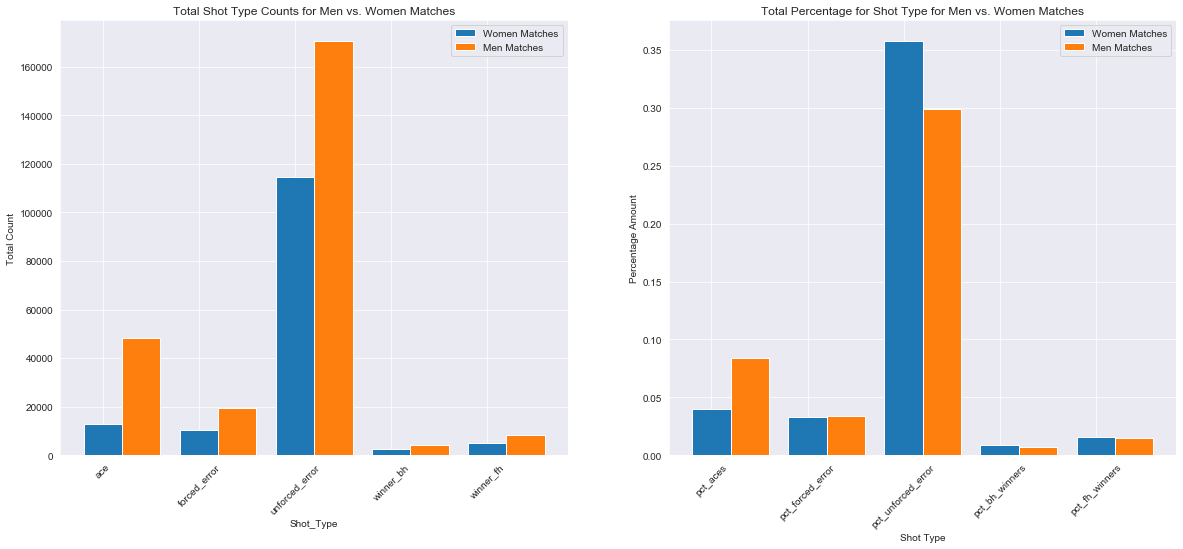

In [19]:
sns.set_style('darkgrid')

# Creating a new figure to plot the totals for aces, fh_winners, bh_winners, unforced errors, and forced errors for 
# men vs. women, and also plotting the average totals for each of the above for men vs. women too
plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)

# Creating the variables that will allow me to plot the bars for men and women in each graph side by side
n = 1
t = 2
d = len(mvw.index)
w = 0.8
# Using the variables above to create the x_values
x_values = [t*element + w*n for element in range(d)]

plt.bar(x_values, mvw['F'], label='Women Matches')

n = 2
t = 2
d = len(mvw.index)
w = 0.8
# Using the variables above to create the x_values
x_values_2 = [t*element + w*n for element in range(d)]

plt.bar(x_values_2, mvw['M'], label='Men Matches')
ax.set_xticks(x_values)
ax.set_xticklabels(mvw.index, rotation=45)
plt.xlabel('Shot_Type')
plt.ylabel('Total Count')
plt.title('Total Shot Type Counts for Men vs. Women Matches')

plt.legend()

ax_2 = plt.subplot(1, 2, 2)

n = 1
t = 2
d = len(mvw_pct.index)
w = 0.8
# Using the variables above to create the x_values
x_values = [t*element + w*n for element in range(d)]

plt.bar(x_values, mvw_pct['F'], label='Women Matches')

n = 2
t = 2
d = len(mvw_pct.index)
w = 0.8
# Using the variables above to create the x_values
x_values_2 = [t*element + w*n for element in range(d)]

plt.bar(x_values_2, mvw_pct['M'], label='Men Matches')
ax_2.set_xticks(x_values)
ax_2.set_xticklabels(mvw_pct.index, rotation=45)
plt.xlabel('Shot Type')
plt.ylabel('Percentage Amount')
plt.title('Total Percentage for Shot Type for Men vs. Women Matches')

plt.legend()
plt.show()

What's interesting in looking at the graphs above is that women on average have a lot more unforced errors then men, but also have slightly more forehand and backhand winners then men. How could this be? Men are known for hitting the ball bigger, and going for more, while Women are known for being very consistent.


I think the amount of aces Men hit could be an indicator as to why it seems that they hit less forehand and backhand winners. Since so many of their points are free points off of their serve, it's possible that they have less opportunities to hit winners on their groundstrokes out of all the points they play. It's possible that Women have higher unforced errors since they seem to go for it on their ground strokes, and they may have longer rallies which could cause a tired player to miss an otherwise easy shot. I'm going to look at rally length further.

### 2.1.1 Winners vs. Unforced Errors vs. Forced Errors
<a id='Winners_v_Unforced_Errors_v_Forced_Errors'></a>

In [20]:
print('Men Winner Percentage: {}'.format(round(100 * men_matches['shot_winner'].value_counts()[1] / 
                                                  (men_matches['shot_winner'].value_counts()[0] +
                                               men_matches['shot_winner'].value_counts()[1]), 2)))

print('Women Winner Percentage: {}'.format(round(100 * women_matches['shot_winner'].value_counts()[1] / 
                                                  (women_matches['shot_winner'].value_counts()[0] +
                                               women_matches['shot_winner'].value_counts()[1]), 2)))
print('\n')

print('Men Percentage of Unforced Errors: {}'.format(round(100 * men_matches['unforced_error'].value_counts()[1] /
                                                    (men_matches['unforced_error'].value_counts()[0] +
                                                    men_matches['unforced_error'].value_counts()[1]), 2)))

print('Women Percentage of Unforced Errors: {}'.format(round(100 * women_matches['unforced_error'
                                                                                ].value_counts()[1] /
                                                    (women_matches['unforced_error'].value_counts()[0] +
                                                    women_matches['unforced_error'].value_counts()[1]), 2)))
print('\n')

print('Men Percentage of Forced Errors: {}'.format(round(100 * men_matches['forced_error'].value_counts()[1] /
                                                        (men_matches['forced_error'].value_counts()[0] + 
                                                        men_matches['forced_error'].value_counts()[1]), 2)))

print('Women Percentage of Forced Errors: {}'.format(round(100 * women_matches['forced_error'].value_counts()[1] /
                                                        (women_matches['forced_error'].value_counts()[0] + 
                                                        women_matches['forced_error'].value_counts()[1]), 2)))
print('\n')

print('Men Forehand Winner Percentage: {}'.format(round(100 * men_matches['winner_fh'].value_counts()[1] /
                                                        (men_matches['winner_fh'].value_counts()[0] + 
                                                        men_matches['winner_fh'].value_counts()[1]), 2)))

print('Women Forehand Winner Percentage: {}'.format(round(100 * women_matches['winner_fh'].value_counts()[1] /
                                                        (women_matches['winner_fh'].value_counts()[0] + 
                                                        women_matches['winner_fh'].value_counts()[1]), 2)))
print('\n')

print('Men Backhand Winner Percentage: {}'.format(round(100 * men_matches['winner_bh'].value_counts()[1] /
                                                        (men_matches['winner_bh'].value_counts()[0] + 
                                                        men_matches['winner_bh'].value_counts()[1]), 2)))

print('Women Backhand Winner Percentage: {}'.format(round(100 * women_matches['winner_bh'].value_counts()[1] /
                                                        (women_matches['winner_bh'].value_counts()[0] + 
                                                        women_matches['winner_bh'].value_counts()[1]), 2)))

Men Winner Percentage: 33.91
Women Winner Percentage: 30.74


Men Percentage of Unforced Errors: 29.89
Women Percentage of Unforced Errors: 35.77


Men Percentage of Forced Errors: 37.01
Women Percentage of Forced Errors: 34.05


Men Forehand Winner Percentage: 16.13
Women Forehand Winner Percentage: 16.73


Men Backhand Winner Percentage: 7.9
Women Backhand Winner Percentage: 8.81


### 2.2 Men vs. Women Rallies
<a id='mvw_rally'></a>

<Figure size 720x360 with 0 Axes>

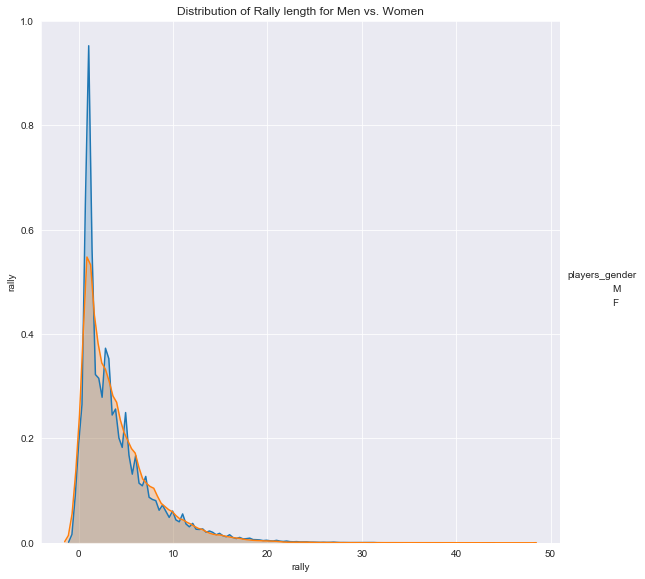

In [21]:
# Gathering all the non-null rallies
rallies = df[df['rally'].notnull()]

plt.figure(figsize=(10, 5))

# Creating a pairplot of rally and gender, with gender as a hue to look at a histogram of rally length frequency
# for Men's vs. Women's matches
sns.pairplot(rallies[['rally', 'players_gender']], 
             hue='players_gender', kind='hist', aspect=1, height=8)
plt.title('Distribution of Rally length for Men vs. Women')
plt.show()

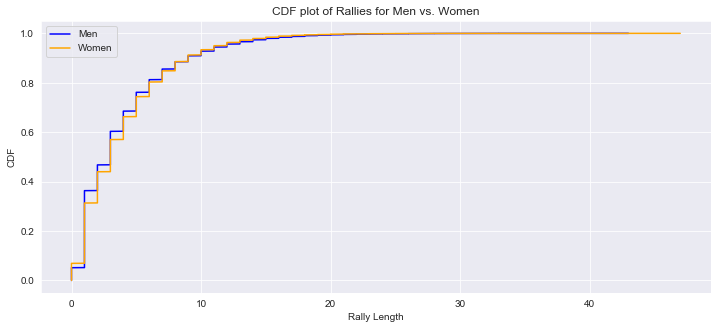

In [22]:
## Creating a numpy array to store rallies to build a CDF plot

plt.figure(figsize=(12, 5))
men_rallies = rallies[rallies['players_gender'] == 'M']['rally']
#men_PDF = []
#for i in range(len(men_rallies.value_counts())):
    
men_rallies = np.array(rallies[rallies['players_gender'] == 'M']['rally'])
men_rallies = np.sort(men_rallies)

women_rallies = np.array(rallies[rallies['players_gender'] == 'F']['rally'])
women_rallies = np.sort(women_rallies)

men_y = np.arange(1, len(men_rallies)+1) / len(men_rallies)
women_y = np.arange(1, len(women_rallies)+1) / len(women_rallies)


plt.plot(men_rallies, men_y, color='blue', label='Men')
plt.plot(women_rallies, women_y, color='orange', label='Women')

plt.margins = 0.02

plt.xlabel('Rally Length')
plt.ylabel('CDF')
plt.legend()
plt.title('CDF plot of Rallies for Men vs. Women')

plt.show()

In [23]:
rallies.head()

,match_id,match_year,slam,match_num,player_1,player_2,match_status,match_winner,event_type,round,court_name,player_1_nation,player_2_nation,elapsed_time,set_number,p1_games_won,p2_games_won,set_winner,game_number,game_winner,point_number,point_winner,point_server,serve_speed_kmh,rally,p1_score,p2_score,p1_momentum,p2_momentum,p1_points_won,p2_points_won,p1_ace,p2_ace,p1_shot_winner,p2_shot_winner,p1_double_fault,p2_double_fault,p1_unforced_error,p2_unforced_error,p1_net_point,p2_net_point,p1_net_point_won,p2_net_point_won,p1_break_point,p2_break_point,p1_break_point_won,p2_break_point_won,p1_first_serve_in,p2_first_serve_in,p1_first_serve_won,p2_first_serve_won,p1_second_serve_in,p2_second_serve_in,p1_second_serve_won,p2_second_serve_won,p1_forced_error,p2_forced_error,history,speed_mph,p1_break_point_missed,p2_break_point_missed,serve_indicator,serve_direction,winner_fh,winner_bh,serving_to,serve_number,winner_type,winner_shot_type,p1_distance_run,p2_distance_run,rallycount,serve_width,serve_depth,return_depth,point_time,players_gender,ace,break_point_missed,forced_error,first_serve_in,first_serve_won,second_serve_in,second_serve_won,break_point,break_point_won,net_point,net_point_won,unforced_error,double_fault,shot_winner
0,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:00:00,1.0,0.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0
1,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:00:00,1.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,218.0,16.0,15,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22020.0,135.0,0.0,0.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.000000000,M,0.0,0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1.0,0.0,0.0
2,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:00:50,1.0,0.0,0.0,NaN,1.0,NaN,2.0,NaN,NaN,162.0,1.0,15,15,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,11030.0,100.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:50.000000000,M,0.0,0,1.0,0.0,0.0,1.0,1.0,0,0,0,0,0.0,0.0,0.0
3,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:01:28,1.0,0.0,0.0,NaN,1.0,NaN,3.0,NaN,NaN,179.0,1.0,15,30,1.0,6.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,21410.0,111.0,0.0,0.0,2.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:38.000000000,M,0.0,0,0.0,0.0,0.0,1.0,1.0,0,0,1,1,0.0,0.0,1.0
4,2011-frenchopen-1101,2011.0,frenchopen,1101.0,Rafael Nadal,John Isner,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,USA,00:02:05,1.0,0.0,0.0,NaN,1.0,NaN,4.0,NaN,NaN,175.0,2.0,30,30,4.0,6.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11010.0,108.0,0.0,0.0,2.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:37.000000000,M,0.0,0,0.0,0.0,0.0,1.0,0.0,0,0,1,1,0.0,0.0,1.0


It would be interesting to see how longer rallies usually end for Men and Women. I'm going to analyze the 90th percentile of rally length and see if there's a trend as to how longer rallies usually end for each gender.

In [24]:
# Getting the value for which 90 percent of rallies are shorter than, and storing it in the variable rally_q_90
rally_q_90 = np.percentile(df[df['rally'].notnull()]['rally'], 90)
rally_q_90

9.0

<Figure size 720x360 with 0 Axes>

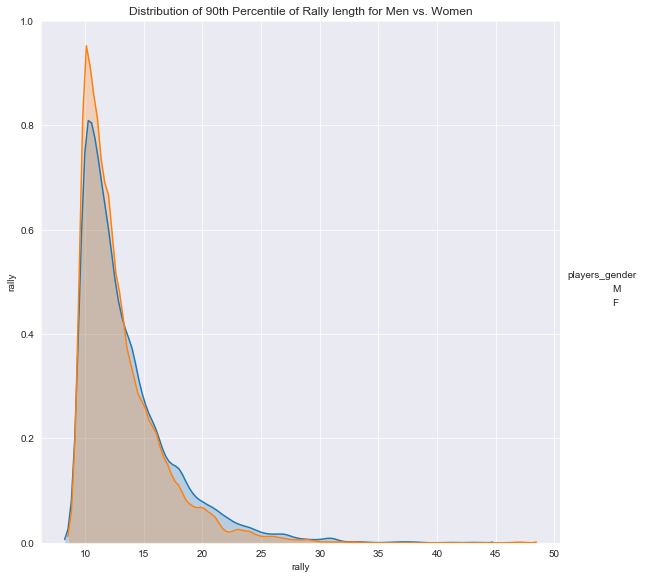

In [25]:
plt.figure(figsize=(10, 5))
# Creating a pairplot of the 90th percentile rallies and gender, with gender as a hue

sns.pairplot(rallies[rallies['rally'] > rally_q_90][['rally', 'players_gender']], hue='players_gender', 
            kind='hist', aspect=1, height=8)
plt.title('Distribution of 90th Percentile of Rally length for Men vs. Women')
plt.show()

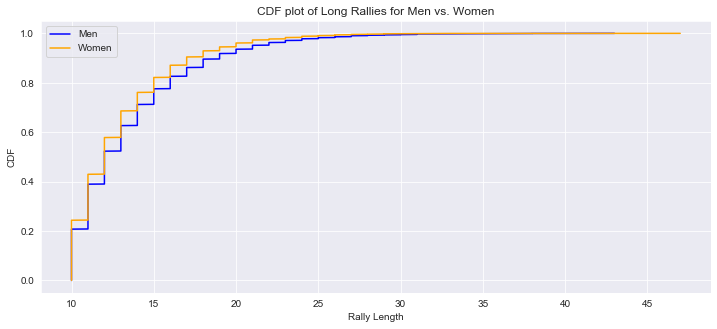

In [26]:
men_90_q_rallies = np.array(rallies[(rallies['rally'] > rally_q_90) & (rallies['players_gender'] == 'M')]['rally'])
men_90_q_rallies = np.sort(men_90_q_rallies)

women_90_q_rallies = np.array(rallies[(rallies['rally'] > rally_q_90) & (rallies['players_gender'] == 'F')]['rally'])
women_90_q_rallies = np.sort(women_90_q_rallies)

men_y = np.arange(1, len(men_90_q_rallies) + 1) / len(men_90_q_rallies)
women_y = np.arange(1, len(women_90_q_rallies) + 1) / len(women_90_q_rallies)

plt.figure(figsize=(12, 5))

plt.plot(men_90_q_rallies, men_y, color='blue', label='Men')
plt.plot(women_90_q_rallies, women_y, color='orange', label='Women')
plt.margin=0.2

plt.xlabel('Rally Length')
plt.ylabel('CDF')
plt.legend()
plt.title('CDF plot of Long Rallies for Men vs. Women')
plt.show()

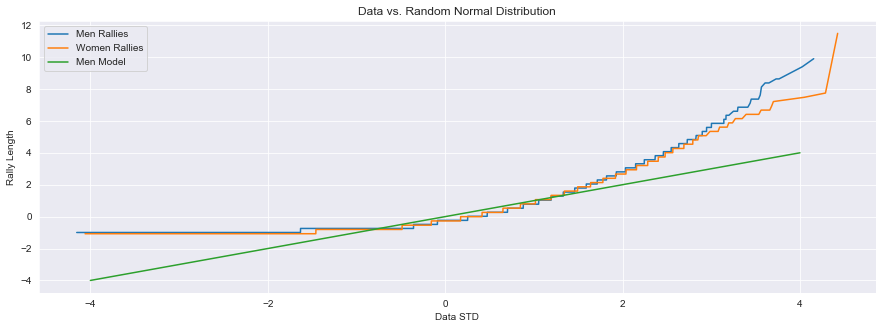

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

men_scaled = scaler.fit_transform(men_rallies.reshape(-1, 1))

women_scaled = scaler.fit_transform(women_rallies.reshape(-1, 1))

men_random = np.random.standard_normal(len(men_scaled))
men_random = np.sort(men_random)

women_random = np.random.standard_normal(len(women_scaled))
women_random = np.sort(women_random)

plt.figure(figsize=(15, 5))

plt.plot(men_random, men_scaled, label='Men Rallies')
plt.plot(women_random, women_scaled, label='Women Rallies')
x = np.arange(-4, 5)
men_y = [xs*men_scaled.std() + men_scaled.mean() for xs in x]
women_y = [xs*women_scaled.std() + women_scaled.mean() for xs in x]
plt.plot(x, women_y, label='Men Model')
#plt.plot(x, women_y, label='Women Model')
plt.xlabel('Data STD')
plt.ylabel('Rally Length')
plt.title('Data vs. Random Normal Distribution')
plt.legend()
plt.show()

In [28]:
men_less_than_90_q_rallies = np.array(rallies[(rallies['rally'] < rally_q_90) 
                                         & (rallies['players_gender'] == 'M')]['rally'])

women_less_than_90_q_rallies = np.array(rallies[(rallies['rally'] < rally_q_90) 
                                           & (rallies['players_gender'] == 'F')]['rally'])

### Hypothesis Testing

I will use Hypothesis testing to see if there is in a difference between Men and Women Rally Length.

Null Hypothesis: There is no difference between the distribution of Men and Women Rally Length a.k.a Men Distribution of Rally Length = Women Distribution of Rally Length

In [29]:
from scipy.stats import ttest_ind

# Testing to see if there is a difference in the entire distribution for Rally Length for Men vs. Women
print('p-value for whole distribution: {}'.format(ttest_ind(men_rallies, women_rallies)[1]))

# Testing to see if there is a difference in the upper 90th percentile distribution for Rally Length for Men vs. Women
print('p-value for 90th percentile: {}'.format(ttest_ind(men_90_q_rallies, women_90_q_rallies)[1]))

# Testing to see if there is a difference in the lower 90th percentile distribution for Rally Length for Men vs. Women
print('p-value for below 90th percentile: {}'.format(ttest_ind(men_less_than_90_q_rallies, 
                                                               women_less_than_90_q_rallies)[1]))

p-value for whole distribution: 0.001968578150488027
p-value for 90th percentile: 6.987760744209525e-10
p-value for below 90th percentile: 7.941482509250147e-26


From the distributions above we can see that in general Men tend to have more short rallies in comparison to Women when normalized. At about the 85th percentile in rally length, or about 10 shots in a rally, Women start to have slightly longer rallies then Men. They even out at about the 99th percentile, or about 26 shots. When we look at the distribution of longer rallies only, it's clear to see that Women have more rallies of legnths 10 - 26 shots then Men. 
We can see that for both Men and Women 85% of rallies are lower than 10 shots, and a majority of rallies are around 1-4 shots, almost 40% of rallies are this length.
When it comes to longer rallies, a majority are 10-11 shots long, with about 20% of long rallies being 10 shots, and 20% of long rallies being 11 shots.

With the calculated p-values above we can tell that these sample results are a good representation of the population, and that the distribution of rally length for Men and Women are not equal to each, and vary as described above, so Men typically have more rallies from 1 - 9 shots in shot length, Women have more rallies from 10 to about 26 shots.

In [30]:

# Creating new DataFrame for the 90th percentile of rally length for Men matches
men_long_rallies = df[(df['rally'] > rally_q_90) & (df['players_gender'] == 'M')]

# Creating new DataFrame for the 90th percentile of rally length for Women matches
women_long_rallies = df[(df['rally'] > rally_q_90) & (df['players_gender'] == 'F')]

# Grouping Men long rallies by rally length, and finding the averages for 'winner_fh', 'winner_bh', 'unforced_error', 
# and'forced_error' to determine what is the most common cause for long rallies coming to an end
men_long_rallies = men_long_rallies.groupby('rally')['winner_fh', 'winner_bh', 'unforced_error', 
                                            'forced_error'].mean().reset_index()


# Grouping Women long rallies by rally length, and finding the averages for 'winner_fh', 'winner_bh', 'unforced_error', 
# and'forced_error' to determine what is the most common cause for long rallies coming to an end
women_long_rallies = women_long_rallies.groupby('rally')['winner_fh', 'winner_bh', 'unforced_error', 
                                            'forced_error'].mean().reset_index()

men_long_rallies.head()

,rally,winner_fh,winner_bh,unforced_error,forced_error
0,10.0,0.196954,0.123858,0.349239,0.329949
1,11.0,0.211137,0.100928,0.344548,0.343387
2,12.0,0.191153,0.139021,0.317536,0.352291
3,13.0,0.200000,0.108163,0.355102,0.336735
4,14.0,0.212346,0.118519,0.311111,0.358025


In [31]:
women_long_rallies.head()

,rally,winner_fh,winner_bh,unforced_error,forced_error
0,10.0,0.251135,0.131619,0.296520,0.320726
1,11.0,0.232143,0.146825,0.265873,0.355159
2,12.0,0.228288,0.148883,0.367246,0.255583
3,13.0,0.222603,0.123288,0.311644,0.342466
4,14.0,0.256158,0.118227,0.334975,0.290640


In [32]:
len(women_long_rallies)

25

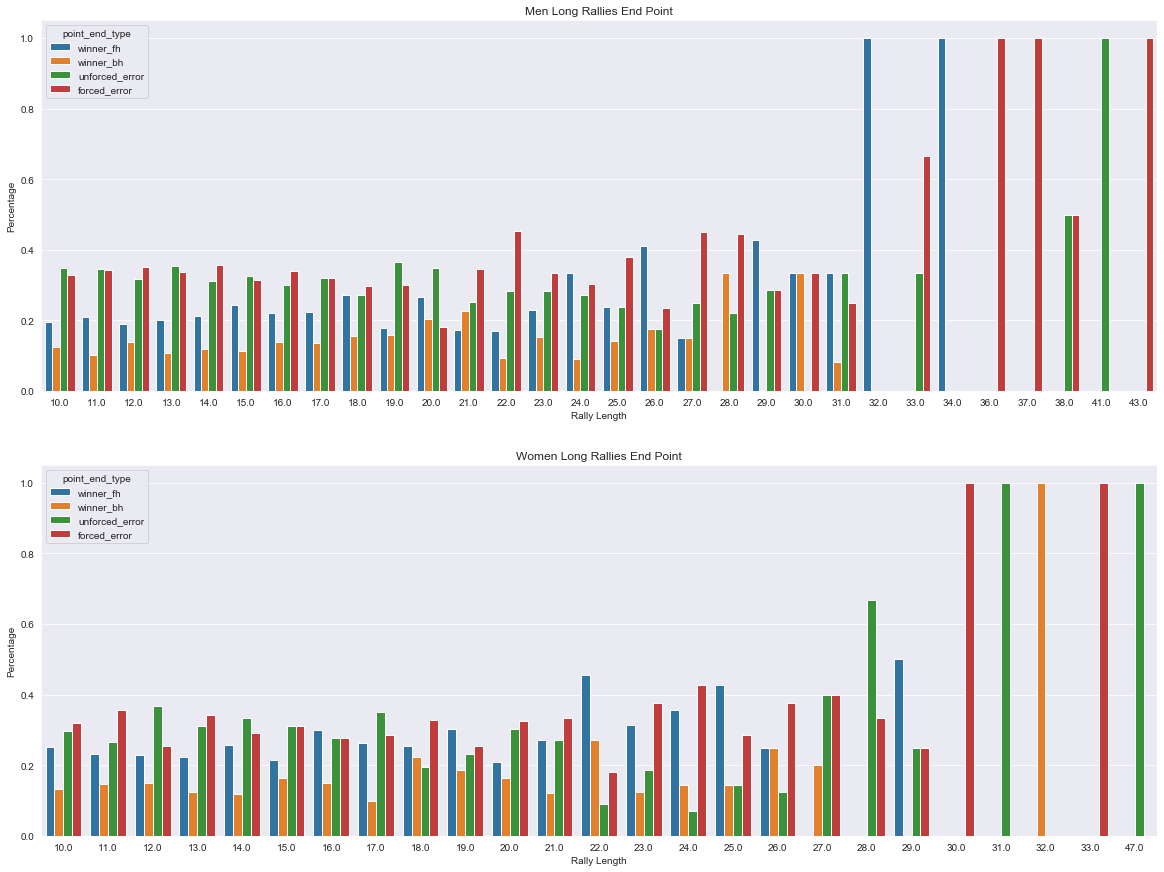

In [33]:
men_rally_melt=pd.melt(men_long_rallies, id_vars='rally', value_vars=men_long_rallies.columns[1:], 
                       value_name='Average', var_name='point_end_type')

plt.figure(figsize=(20, 15))
ax = plt.subplot(211)
sns.barplot(x='rally', y='Average', data=men_rally_melt, hue='point_end_type')

plt.title('Men Long Rallies End Point')
plt.xlabel('Rally Length')
plt.ylabel('Percentage')

women_rally_melt=pd.melt(women_long_rallies, id_vars='rally', 
                         value_vars=women_long_rallies.columns[1:], value_name='Average', var_name='point_end_type')

ax_2 = plt.subplot(212)
sns.barplot(x='rally', y='Average', data=women_rally_melt, hue='point_end_type')

plt.title('Women Long Rallies End Point')
plt.xlabel('Rally Length')
plt.ylabel('Percentage')
plt.show()

In [34]:
men_rally_averages = {}

for column in men_long_rallies.columns[1:]:
    men_rally_averages[column] = men_long_rallies[column].sum() / len(men_long_rallies)
    
men_long_rally_averages = pd.DataFrame.from_dict(men_rally_averages, orient='index').rename(columns={0: 'Average'})

women_rally_averages = {}

for column in women_long_rallies.columns[1:]:
    women_rally_averages[column] = women_long_rallies[column].sum() / len(women_long_rallies)
    
women_long_rally_averages = pd.DataFrame.from_dict(women_rally_averages, 
                                                   orient='index').rename(columns={0: 'Average'})

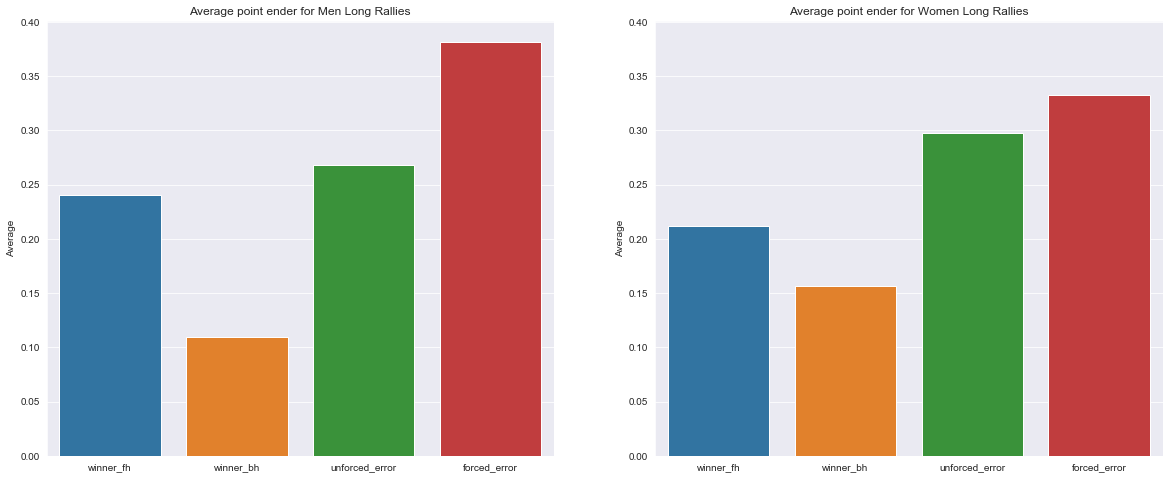

In [35]:
plt.figure(figsize=(20, 8))

ax = plt.subplot(121)
sns.barplot(x=men_long_rally_averages.index, y='Average', data=men_long_rally_averages)
plt.title('Average point ender for Men Long Rallies')

ax_2 = plt.subplot(122, sharey=ax)
sns.barplot(x=women_long_rally_averages.index, y='Average', data=women_long_rally_averages)
plt.title('Average point ender for Women Long Rallies')
plt.show()

### Hypothesis Testing

In [36]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

f_oneway(men_long_rallies['winner_fh'], men_long_rallies['winner_bh'],
        men_long_rallies['unforced_error'], men_long_rallies['forced_error'])

men_long_rallies_ht = np.concatenate([men_long_rallies['winner_fh'],  men_long_rallies['winner_bh'],
                                    men_long_rallies['unforced_error'], men_long_rallies['forced_error']])

labels = ['winner_fh'] * len(men_long_rallies['winner_fh']) + ['winner_bh'] * len(men_long_rallies['winner_bh']) +\
['unforced_error'] * len(men_long_rallies['unforced_error'])+ ['forced_error'] * len(men_long_rallies['forced_error'])

tukey_results = pairwise_tukeyhsd(men_long_rallies_ht, labels, 0.05)
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
forced_error,unforced_error,-0.1138,0.1417,-0.2513,0.0238,False
forced_error,winner_bh,-0.2724,0.001,-0.41,-0.1349,True
forced_error,winner_fh,-0.1412,0.0419,-0.2787,-0.0037,True
unforced_error,winner_bh,-0.1587,0.0168,-0.2962,-0.0211,True
unforced_error,winner_fh,-0.0274,0.9,-0.1649,0.1101,False
winner_bh,winner_fh,0.1312,0.0673,-0.0063,0.2688,False


In [37]:
f_oneway(women_long_rallies['winner_fh'], women_long_rallies['winner_bh'],
        women_long_rallies['unforced_error'], women_long_rallies['forced_error'])

women_long_rallies_ht = np.concatenate([women_long_rallies['winner_fh'],  women_long_rallies['winner_bh'],
                                    women_long_rallies['unforced_error'], women_long_rallies['forced_error']])

labels = ['winner_fh'] * len(women_long_rallies['winner_fh']) + ['winner_bh'] * len(women_long_rallies['winner_bh']) +\
['unforced_error'] * len(women_long_rallies['unforced_error'])+ ['forced_error'] * len(women_long_rallies['forced_error'])

tukey_results = pairwise_tukeyhsd(women_long_rallies_ht, labels, 0.05)
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
forced_error,unforced_error,-0.0344,0.9,-0.1916,0.1229,False
forced_error,winner_bh,-0.176,0.0219,-0.3333,-0.0188,True
forced_error,winner_fh,-0.1201,0.1963,-0.2774,0.0371,False
unforced_error,winner_bh,-0.1417,0.0928,-0.2989,0.0156,False
unforced_error,winner_fh,-0.0858,0.4868,-0.243,0.0715,False
winner_bh,winner_fh,0.0559,0.7641,-0.1014,0.2132,False


From the visualization above Men and Women rally lengths look almost identical, with the major difference being that the men have a much greater amount of points being between around 1-2 shots then women. Both distributions are right skewed, and indicate as anticipated that a majority of rallies are short. 

When looking at longer rallies, I see a lot of forced errors being the reason for the point coming to an end. I also see a lot of unforced errors being the reason for a long rally coming to an end. Forehand winners are occasionally the main culprit for ending a long rally, but backhand winners seem to very rarely be the cause for the end of the point for longer rallies.

Men long rallies tend to end because of forced errors around 38% of the time, unforced errors around 26% of the time, forehand winners around 24% of the time, and backhand winners only around 11% of the time.

Women long rallies tend to end because of forced errors around 33% of the time, unforced errors around 30% of the time, forehand winners around 21% of the time, and backhand winners around 16% of the time.

What I conclude from this is if you're playing a Men's match and find yourself in a long rally, the best option is to try and move your opponent around as much as possible, but within a margin of safety in order to force them to make an error while on the run. If that doesn't work, then I would suggest playing to their backhand as often as possible, since they are less likely to hit a winner off that side, and there's a good chance that as the rally gets longer the chance of making an unforced error increases.

If you're playing a Women's match and find yourself in a long rally, the best option is also to try and move your opponent around as much as possible, but within a margin of safety in order to force them to make an error while on the run. The next bext thing is to try and stay as consistent as possible as Women have a higher chance of hitting an unforced error the longer the point is.

I'd like to look at the distribution of serve speeds for each men and women.

### 2.3 Men vs. Women Serving
<a id= 'm/w_serving'></a>

### 2.3.1 Serve Speed
<a id='serve_speed'></a>

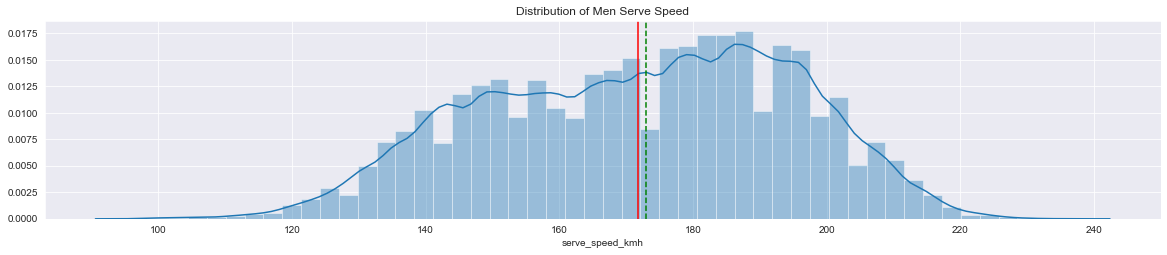

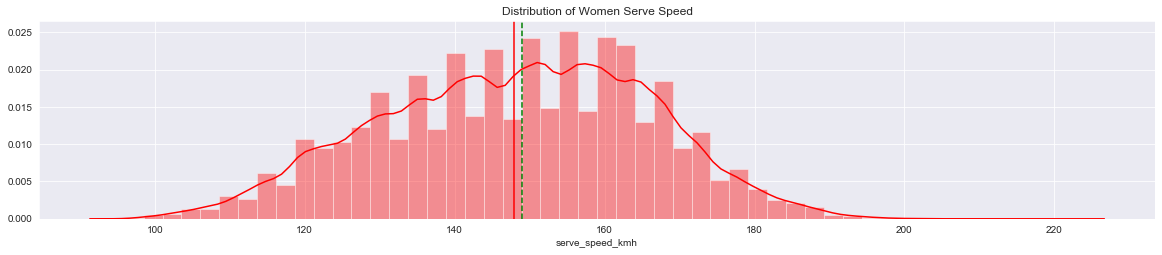

In [38]:
# Calculating the mean and median of serve speed for Men matches
men_serve_mean = men_matches[men_matches['serve_speed_kmh'] > 0]['serve_speed_kmh'].mean()

men_serve_median = men_matches[men_matches['serve_speed_kmh'] > 0]['serve_speed_kmh'].median()

# Calculating the mean and median of serve speed for Women matches
women_serve_mean = women_matches[women_matches['serve_speed_kmh'] > 0]['serve_speed_kmh'].mean()

women_serve_median = women_matches[women_matches['serve_speed_kmh'] > 0]['serve_speed_kmh'].median()


plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
sns.distplot(men_matches[(men_matches['serve_speed_kmh'].notnull()) & (men_matches['serve_speed_kmh']
                                                                      > 0)]['serve_speed_kmh'])

# Plotting the Mean and Median lines for men serve speed on distribution plot
plt.axvline(men_serve_mean, color='r')
plt.axvline(men_serve_median, color='g', linestyle='--')
plt.title('Distribution of Men Serve Speed')
plt.show()

plt.figure(figsize=(20, 8))
plt.subplot(2, 1, 2)
sns.distplot(women_matches[(women_matches['serve_speed_kmh'].notnull()) & 
                          (women_matches['serve_speed_kmh'] > 0)]['serve_speed_kmh'], color='red')

# Plotting the Mean and Median lines for women serve speed on distribution plot
plt.axvline(women_serve_mean, color='r')
plt.axvline(women_serve_median, color='g', linestyle='--')
plt.title('Distribution of Women Serve Speed')
plt.show()

#### First Serve Speed

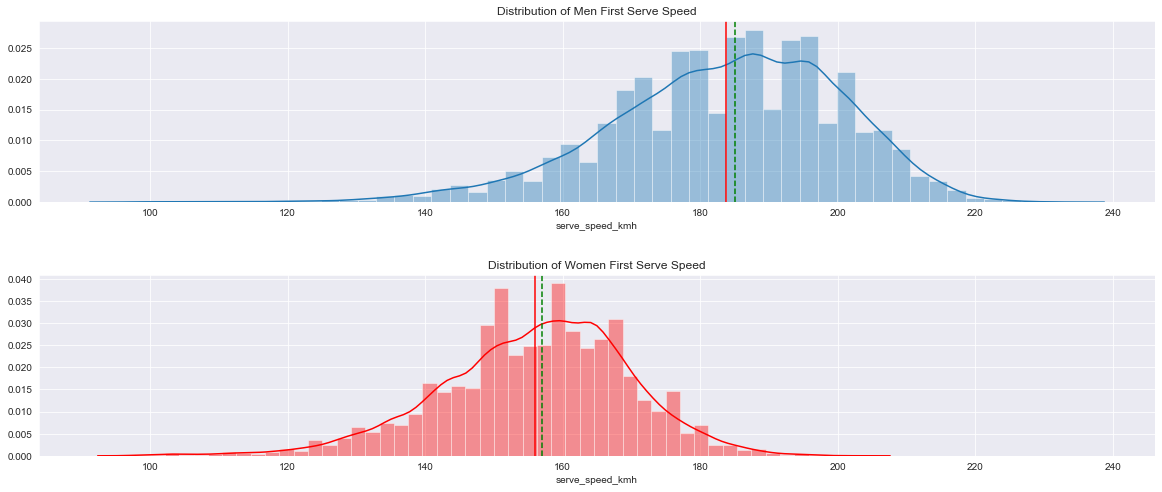

In [39]:
men_first_serves = men_matches[(men_matches['first_serve_in']  == 1) &
                              (men_matches['serve_speed_kmh']  > 0)]

men_fs_mean = men_first_serves['serve_speed_kmh'].mean()
men_fs_median = men_first_serves['serve_speed_kmh'].median()

plt.figure(figsize=(20, 8))
ax = plt.subplot(211)

sns.distplot(men_first_serves['serve_speed_kmh'])
plt.axvline(men_fs_mean, color='r')
plt.axvline(men_fs_median, color='g', linestyle='--')
plt.title('Distribution of Men First Serve Speed')

women_first_serves = women_matches[(women_matches['first_serve_in'] == 1) &
                                  (women_matches['serve_speed_kmh'] > 0)]

women_fs_mean = women_first_serves['serve_speed_kmh'].mean()
women_fs_median = women_first_serves['serve_speed_kmh'].median()

plt.subplots_adjust(hspace=0.4)

ax_2 = plt.subplot(212, sharex=ax)

sns.distplot(women_first_serves['serve_speed_kmh'], color='r')
plt.axvline(women_fs_mean, color='r')
plt.axvline(women_fs_median, color='g', linestyle='--')
plt.title('Distribution of Women First Serve Speed')

plt.show()

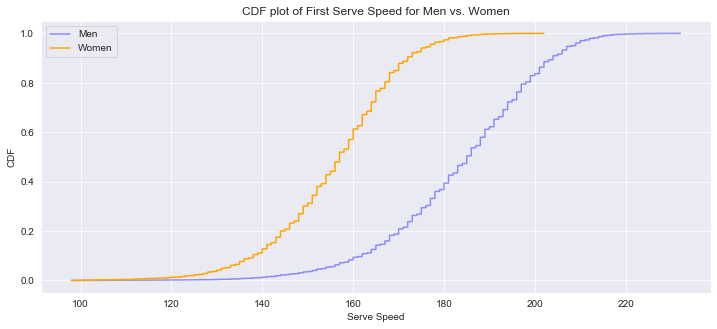

In [40]:
# Plotting a CDF to compare dsitributions

men_f_serve = np.array(men_matches[(men_matches['first_serve_in']  == 1) &
                              (men_matches['serve_speed_kmh']  > 0)]['serve_speed_kmh'])
men_f_serve = np.sort(men_f_serve)
men_f_serve_y = np.arange(1, len(men_f_serve) + 1) / len(men_f_serve)

women_f_serve = np.array(women_matches[(women_matches['first_serve_in']  == 1) &
                              (women_matches['serve_speed_kmh']  > 0)]['serve_speed_kmh'])
women_f_serve = np.sort(women_f_serve)
women_f_serve_y = np.arange(1, len(women_f_serve) + 1) / len(women_f_serve)

plt.figure(figsize=(12, 5))
plt.plot(men_f_serve, men_f_serve_y, color='blue', label='Men', alpha=0.4)
plt.plot(women_f_serve, women_f_serve_y, color='orange', label='Women')
plt.margins = 0.02
plt.xlabel('Serve Speed')
plt.ylabel('CDF')
plt.legend()
plt.title('CDF plot of First Serve Speed for Men vs. Women')

plt.show()

#### Second Serve Speed

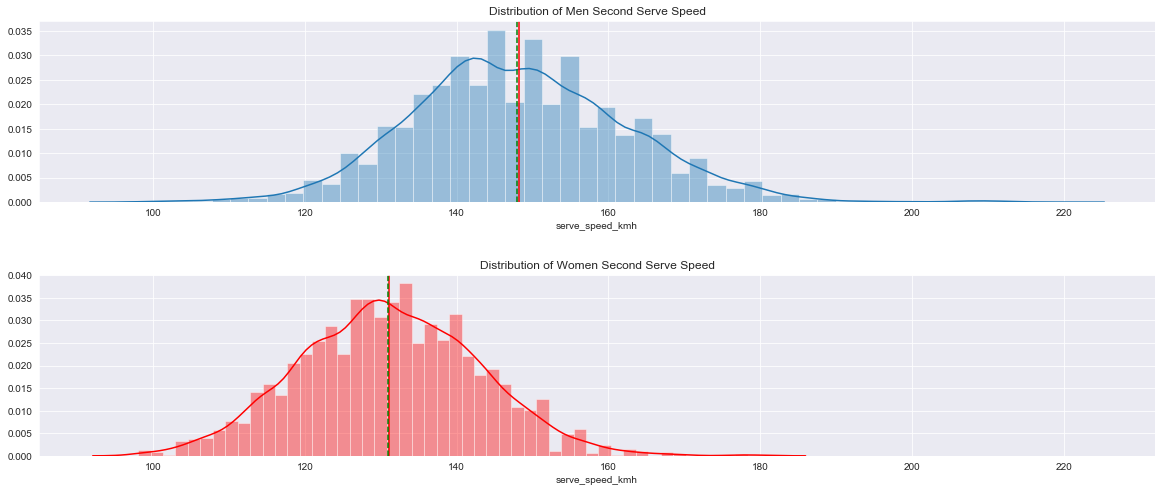

In [41]:
men_second_serves = men_matches[(men_matches['second_serve_in']  == 1) &
                              (men_matches['serve_speed_kmh']  > 0)]

men_ss_mean = men_second_serves['serve_speed_kmh'].mean()
men_ss_median = men_second_serves['serve_speed_kmh'].median()

plt.figure(figsize=(20, 8))
ax = plt.subplot(211)

sns.distplot(men_second_serves['serve_speed_kmh'])
plt.axvline(men_ss_mean, color='r')
plt.axvline(men_ss_median, color='g', linestyle='--')
plt.title('Distribution of Men Second Serve Speed')

women_second_serves = women_matches[(women_matches['second_serve_in'] == 1) &
                                  (women_matches['serve_speed_kmh'] > 0)]

women_ss_mean = women_second_serves['serve_speed_kmh'].mean()
women_ss_median = women_second_serves['serve_speed_kmh'].median()

plt.subplots_adjust(hspace=0.4)

ax_2 = plt.subplot(212, sharex=ax)

sns.distplot(women_second_serves['serve_speed_kmh'], color='r')
plt.axvline(women_ss_mean, color='r')
plt.axvline(women_ss_median, color='g', linestyle='--')
plt.title('Distribution of Women Second Serve Speed')

plt.show()

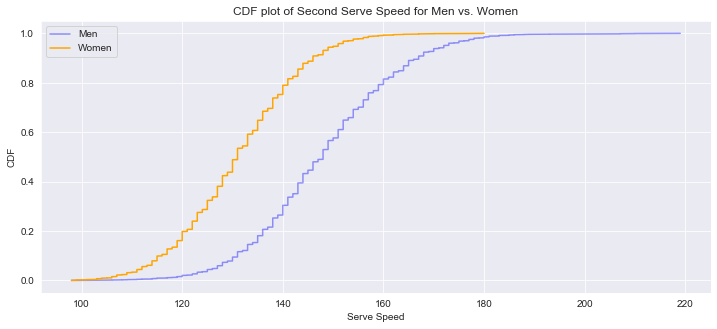

In [42]:
# Plotting a CDF to compare dsitributions

men_ss_serve = np.array(men_matches[(men_matches['second_serve_in']  == 1) &
                              (men_matches['serve_speed_kmh']  > 0)]['serve_speed_kmh'])
men_ss_serve = np.sort(men_ss_serve)
men_ss_serve_y = np.arange(1, len(men_ss_serve) + 1) / len(men_ss_serve)

women_ss_serve = np.array(women_matches[(women_matches['second_serve_in']  == 1) &
                              (women_matches['serve_speed_kmh']  > 0)]['serve_speed_kmh'])
women_ss_serve = np.sort(women_ss_serve)
women_ss_serve_y = np.arange(1, len(women_ss_serve) + 1) / len(women_ss_serve)

plt.figure(figsize=(12, 5))
plt.plot(men_ss_serve, men_ss_serve_y, color='blue', label='Men', alpha=0.4)
plt.plot(women_ss_serve, women_ss_serve_y, color='orange', label='Women')
plt.margins = 0.02
plt.xlabel('Serve Speed')
plt.ylabel('CDF')
plt.legend()
plt.title('CDF plot of Second Serve Speed for Men vs. Women')

plt.show()

In [43]:
men_serve_std = men_matches[(men_matches['serve_speed_kmh'].notnull()) & 
                              (men_matches['serve_speed_kmh'] > 0)]['serve_speed_kmh'].std()

women_serve_std = women_matches[(women_matches['serve_speed_kmh'].notnull()) & 
                                (women_matches['serve_speed_kmh'] > 0)]['serve_speed_kmh'].std()

print('Percentage of Men\'s Serves Over 200 kmh: {}'.format(100 *
    len(men_matches[(men_matches['serve_speed_kmh'].notnull()) & 
           (men_matches['serve_speed_kmh'] >= 200)]['serve_speed_kmh']) / 
    len(men_matches[men_matches['serve_speed_kmh'].notnull()])))


Percentage of Men's Serves Over 200 kmh: 8.887217095779716


On average Men are serving about 20 kmh faster than women. Both distributions for Men and Women serve speed are almost normal distributions, but are slightly left skewed with the mean being slightly less than the median. About 8-9% of men's serves are 200 kmh or higher, while there isn't a single women's serve that reaches that speed. The range of Men's serve speeds are also higher then that of Women serve speeds.

### Hypothesis Testing on Serve Speed
In order to see if the results above are indicative of the population I will perform a hypothesis test on the means of the serve speed distribution for Men and Women

The Null Hypothesis: Men Serve Speed is equal to Women Serve Speed

In [44]:
men_general_serve_speed = men_matches[(men_matches['serve_speed_kmh'].notnull()) & (men_matches['serve_speed_kmh']
                                                                      > 0)]['serve_speed_kmh']

women_general_serve_speed = women_matches[(women_matches['serve_speed_kmh'].notnull()) & 
                                          (women_matches['serve_speed_kmh'] > 0)]['serve_speed_kmh']

print('p-value for general serve speed: %0.3f' % (ttest_ind(men_general_serve_speed, women_general_serve_speed)[1]))

print('p-value for first serve speed %0.3f' % (ttest_ind(men_f_serve, women_f_serve)[1]))

print('p-value for second serve speed %0.3f' % (ttest_ind(men_ss_serve, women_ss_serve)[1]))

p-value for general serve speed: 0.000
p-value for first serve speed 0.000
p-value for second serve speed 0.000


I can conclude that the distributions of Serve Speed in general, and first serve and second serve speeds for Men and Women are statistically significantly not equal to each other.

This confirms that for the population Men are serving faster on average than Women.

### 2.3.2 First & Second Serve Percentages
<a id='first+second_serve_percentages'></a>

In [45]:
# Adding the total first serves registered as being in play for all men matches
men_first_serve_in_total = men_matches['first_serve_in'].value_counts()[1]

# Creating a variable with the total first serves made by men
men_total_first_serves = len(men_matches[men_matches.first_serve_in.notnull()])

# Calculating men's first serve percentage
men_first_serve_pct = round(men_first_serve_in_total / men_total_first_serves * 100, 2)

# Adding the total first serves registered as being in play for all women matches
women_first_serve_in_total = women_matches['first_serve_in'].value_counts()[1] 

# Creating a variable with the total first serves made by women
women_first_serves = women_matches.first_serve_in.value_counts()[0] + women_matches.first_serve_in.value_counts()[1]

# Calculating women's first serve percentage
women_first_serve_pct = round(women_first_serve_in_total / women_first_serves * 100, 2)

print("Men's first serve percentage: {}".format(men_first_serve_pct))
print("Women's first serve percentage: {}".format(women_first_serve_pct))

Men's first serve percentage: 60.98
Women's first serve percentage: 61.87


In [46]:
# Looking at first serve points won

# Creating a variable to hold total first serve points won by men
men_first_serve_points_won = men_matches['first_serve_won'].value_counts()[1]

# Creating a variable for percentage of Men's first serve points won
pct_men_first_serve_won = round(men_first_serve_points_won / men_first_serve_in_total * 100, 2)

# Creating a variable to hold total first serve points won by women
women_first_serve_points_won = women_matches['first_serve_won'].value_counts()[1]

# Creating a variable for percentage of Men's first serve points won
pct_women_first_serve_won = round(women_first_serve_points_won / women_first_serve_in_total * 100, 2)

print('Percentage of Men First Serve Points Won: {}'.format(pct_men_first_serve_won))
print('Percentage of Women First Serve Points Won: {}'.format(pct_women_first_serve_won))

Percentage of Men First Serve Points Won: 71.15
Percentage of Women First Serve Points Won: 63.46


In [47]:
# Looking at Second Serve

# Creating a variable for Men total second serves in
men_second_serves_in = men_matches['second_serve_in'].value_counts()[1]

# Creating a variable for Men total second serves
men_total_second_serves = len(men_matches[(men_matches['first_serve_in'] == 0)])

# Calculating the percentage of Second Serves that go in the court for Men
pct_men_second_serves_in = round(men_second_serves_in / men_total_second_serves * 100, 2)

# Creating a variable for Women total second serves in
women_second_serves_in = women_matches['second_serve_in'].value_counts()[1]

# Creating a variable for Women total second serves
women_total_second_serves = len(women_matches[(women_matches['first_serve_in'] == 0)])

# Calculating the percentage of Second Serves that go in the court for Women
pct_women_second_serves_in = round(women_second_serves_in / women_total_second_serves * 100, 2)

print('Men\'s second serve Percentage: {}'.format(pct_men_second_serves_in))
print('Women\'s second serve Percentage: {}'.format(pct_women_second_serves_in))

Men's second serve Percentage: 90.45
Women's second serve Percentage: 85.03


In [48]:
# Calculating the amount of second serve points won on average for Men
men_ss_point_won = men_matches['second_serve_won'].value_counts()[1]

pct_men_ss_point_won = round(men_ss_point_won / men_total_second_serves * 100, 2)

# Calculating the amount of second serve points won on average for Women
women_ss_point_won = women_matches['second_serve_won'].value_counts()[1]

pct_women_ss_point_won = round(women_ss_point_won / women_total_second_serves * 100, 2)

print('Percentage of Men Second Serve Points Won: {}'.format(pct_men_ss_point_won))
print('Percentage of Women Second Serve Points Won: {}'.format(pct_women_ss_point_won))

Percentage of Men Second Serve Points Won: 49.97
Percentage of Women Second Serve Points Won: 43.68


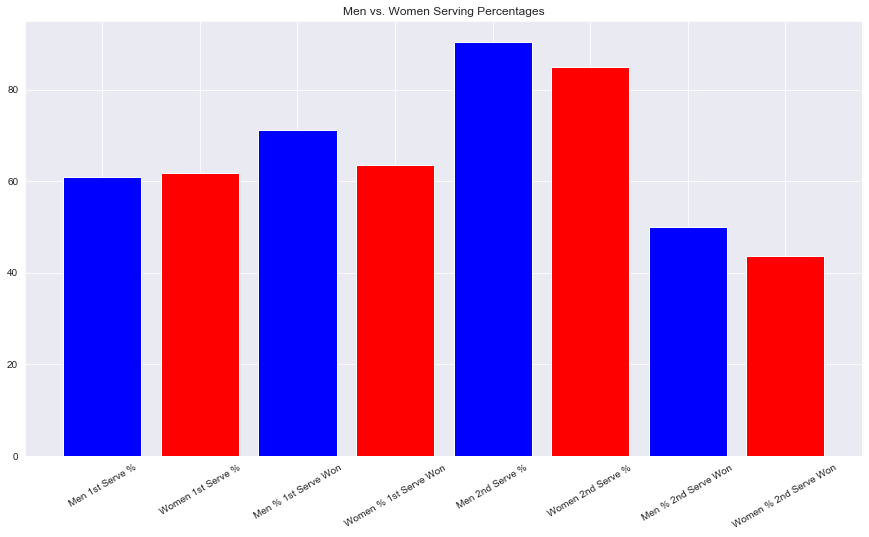

In [49]:
# Plotting out the serving results above

plt.figure(figsize=(15, 8))
ax = plt.subplot()
plt.bar(1, men_first_serve_pct, color='b')
plt.bar(2, women_first_serve_pct, color='r')
plt.bar(3, pct_men_first_serve_won, color='b')
plt.bar(4, pct_women_first_serve_won, color='r')
plt.bar(5, pct_men_second_serves_in, color='b')
plt.bar(6, pct_women_second_serves_in, color='r')
plt.bar(7, pct_men_ss_point_won, color='b')
plt.bar(8, pct_women_ss_point_won, color='r')
ax.set_xticks(range(1, 9))
ax.set_xticklabels(['Men 1st Serve %', 'Women 1st Serve %', 'Men % 1st Serve Won',
                   'Women % 1st Serve Won', 'Men 2nd Serve %', 'Women 2nd Serve %',
                   'Men % 2nd Serve Won', 'Women % 2nd Serve Won'], rotation=30)
plt.title('Men vs. Women Serving Percentages')

plt.show()

In [50]:
# Looking at double faults

men_total_double_faults = men_matches['double_fault'].value_counts()[1]

women_total_double_faults = women_matches['double_fault'].value_counts()[1]

men_total_points = len((men_matches['first_serve_in'].notnull()))

women_total_points = len((women_matches['first_serve_in'].notnull()))

men_pct_double_faults = round(men_total_double_faults / men_total_points * 100, 2)
women_pct_double_faults = round(women_total_double_faults / women_total_points * 100, 2)

print('Men Percentage of Double Faults: {}'.format(men_pct_double_faults))
print('Men Total Double Faults: {}\n'.format(men_total_double_faults))

print('Women Percentage of Double Faults: {}'.format(women_pct_double_faults))
print('Women Total Double Faults: {}'.format(women_total_double_faults))

Men Percentage of Double Faults: 3.5
Men Total Double Faults: 19985

Women Percentage of Double Faults: 4.81
Women Total Double Faults: 15386


Although Women have a higher first serve percentage, Men on average win more percentage of points on their first serve, have a higher second serve percentage, and  win more percentage of points on their second serve. Furthermore men have a lower percentage of double faults on average than Women, and a higher percentage of Aces. Although I haven't looked to see the signifigance of serve on winning yet, I am beginning to see a trend that Men's serves are superior to Women's serves, and may play a more important role for winning a Men's match, vs. a Women's match. What's a somehat shocking statistic, is that Men on average win only 49% of their second serve points. If you win more than half of your second serve points on average I believe you will have a greater of winning.

### Hypothesis Testing

#### Testing to see if First Serve Percentage in this Sample is an accurate depiction of the Population First Serve Percentage
Men Null Hypothesis: Men First Serve Percentage = 61%

Women Null Hypothesis: Women First Serve Percentage = 62%

In [51]:
from scipy.stats import binom_test

# Testing to see if Men's first serve percentage population parameter is also around 61%
print('Men 1st serve % p-value: {}'.format(binom_test(men_first_serve_in_total, 
                                                    men_total_first_serves, p=0.61, alternative='two-sided')))

# Testing to see if Men's first serve percentage population parameter is also around 62%
print('Women 1st serve % p-value: {}'.format(binom_test(women_first_serve_in_total, 
                                                      women_first_serves, p=0.62, alternative='two-sided')))

Men 1st serve % p-value: 0.9284323169320542
Women 1st serve % p-value: 0.6434628028367425


#### Testing to see if First Serve Points Won in this Sample is an accurate depiction of the Population First Serve Points Won
Men Null Hypothesis: Men First Serve Winning Percentage = 71%

Women Null Hypothesis: Women First Serve Winning Percentage = 63%

In [52]:
# Testing to see if Men's first serve percentage won population parameter is also around 71%
print('Men 1st serve % points won p-value: {}'.format(binom_test(men_first_serve_points_won, 
                                                    men_first_serve_in_total, p=0.71, alternative='two-sided')))

# Testing to see if Men's first serve percentage won population parameter is also around 61%
print('Women 1st serve % points won p-value: {}'.format(binom_test(women_first_serve_points_won, 
                                                      women_first_serve_in_total, p=0.63, alternative='two-sided')))

Men 1st serve % points won p-value: 0.5695517249775391
Women 1st serve % points won p-value: 0.18751077720481896


#### Testing to see if Second Serve Percentage in this Sample is an accurate depiction of the Population Second Serve Percentage

Men Null Hypothesis: Men Second Serve Percentage = 90%

Women Null Hypothesis: Women Second Serve Percentage = 85%

In [53]:
print('Men 2nd Serve % p-value: {}'.format(binom_test(men_second_serves_in, men_total_second_serves, p=.90,
                                                    alternative='two-sided')))

print('Women 2nd Serve % p-value: {}'.format(binom_test(women_second_serves_in, women_total_second_serves, p= .85,
                                                    alternative='two-sided')))

Men 2nd Serve % p-value: 0.03148726794108504
Women 2nd Serve % p-value: 0.9280617703556222


#### Testing to see if Second Serve Points Won in this Sample is an accurate depiction of the Population Second Serve Points Won

Men Null Hypothesis: Men Second Serve Winning Percentage = 50%

Women Null Hypothesis: Women Second Serve Winning Percentage = 43%

In [54]:
print('Men 2nd Serve % points won p-value: {}'.format(binom_test(men_ss_point_won, men_total_second_serves,
                                                                 p= .50, alternative='two-sided')))
      
print('Women 2nd Serve % points won p-value: {}'.format(binom_test(women_ss_point_won, women_total_second_serves,
                                                                 p= .43, alternative='two-sided')))

Men 2nd Serve % points won p-value: 0.9329300863671725
Women 2nd Serve % points won p-value: 0.13664227795483214


We can accept all the null hypothesis' above, except Men's Second Serve percentage. We can reject that Null Hypothesis, and conclude that Men's second serve percentage may not be 90% for the overall population.

### 2.3.3 Serve Width and Depth
<a id='serve_width_and_depth'></a>

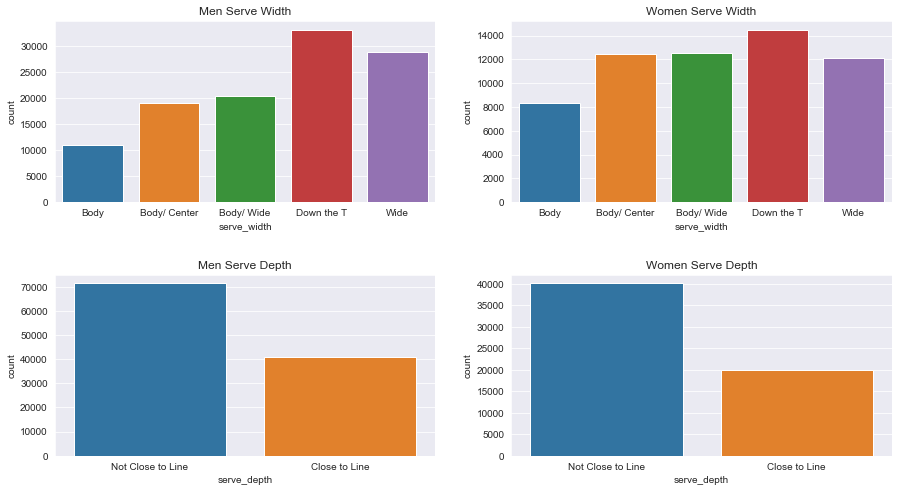

In [55]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='serve_width', data=men_matches.sort_values('serve_width'))
plt.title('Men Serve Width')

plt.subplot(2, 2, 2)
sns.countplot(x='serve_width', data=women_matches.sort_values('serve_width'))
plt.title('Women Serve Width')

plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 2, 3)
sns.countplot(x='serve_depth', data=men_matches)
plt.title('Men Serve Depth')

plt.subplot(2, 2, 4)
sns.countplot(x='serve_depth', data=women_matches)
plt.title('Women Serve Depth')

plt.show()

In [56]:
men_percentage_serve_width_values = {}
for index in men_matches['serve_width'].value_counts().index:
    men_percentage_serve_width_values[index] = round(men_matches['serve_width'].value_counts()[index] / 
    len(men_matches[men_matches['serve_width'].notnull()]) * 100, 2)
    
women_percentage_serve_width_values = {}
for index in women_matches['serve_width'].value_counts().index:
    women_percentage_serve_width_values[index] = round(women_matches['serve_width'].value_counts()[index] / 
    len(women_matches[women_matches['serve_width'].notnull()]) * 100, 2)

men_percentage_serve_depth_values = {}
for index in men_matches['serve_depth'].value_counts().index:
    men_percentage_serve_depth_values[index] = round(men_matches['serve_depth'].value_counts()[index] /
    len(men_matches[men_matches['serve_depth'].notnull()]) * 100, 2)
    
women_percentage_serve_depth_values = {}
for index in women_matches['serve_depth'].value_counts().index:
    women_percentage_serve_depth_values[index] = round(women_matches['serve_depth'].value_counts()[index] /
    len(women_matches[women_matches['serve_depth'].notnull()]) * 100, 2)

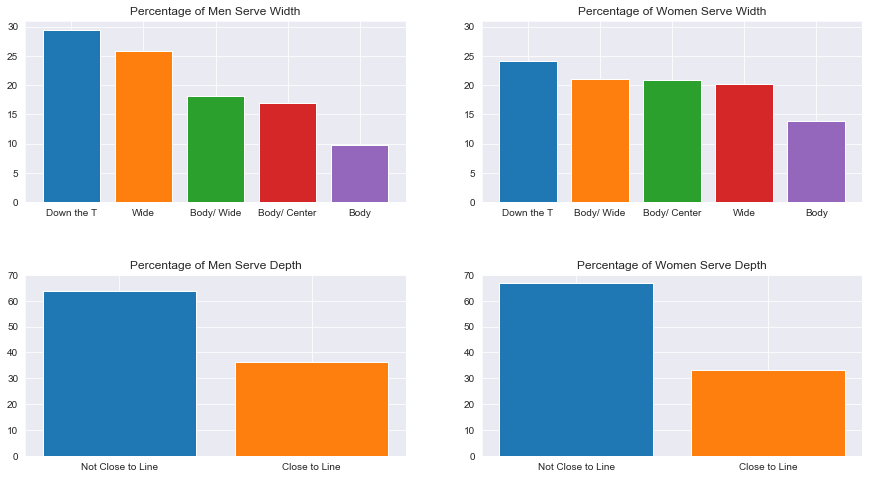

In [57]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(2, 2, 1)
for key, value in men_percentage_serve_width_values.items():
    plt.bar(key, value)
plt.title('Percentage of Men Serve Width')
    
plt.subplot(2, 2, 2, sharey=ax)
for key, value in women_percentage_serve_width_values.items():
    plt.bar(key, value)
plt.title('Percentage of Women Serve Width')

plt.subplots_adjust(hspace=0.4)

ax_2 = plt.subplot(2, 2, 3)
for key, value in men_percentage_serve_depth_values.items():
    plt.bar(key, value)
plt.title('Percentage of Men Serve Depth')
    
plt.subplot(2, 2, 4, sharey=ax_2)
for key, value in women_percentage_serve_depth_values.items():
    plt.bar(key, value)
plt.title('Percentage of Women Serve Depth')

plt.show()

### Hypothesis Testing

#### Testing if there is infact a significant difference in Serve Width, or if the differences are just due to chance

Null Hypothesis: Men Serve Width = Women Serve Width, any deviations are due to chance

In [58]:
from scipy.stats import chi2_contingency

men_sw_ct = men_matches.groupby('serve_width')['match_id'].count().reset_index().set_index('serve_width').transpose()

women_sw_ct = women_matches.groupby('serve_width')['match_id'].count().reset_index().set_index('serve_width').transpose()

sw_ct = men_sw_ct.append([women_sw_ct])

sw_ct = sw_ct.reset_index().rename(index={0: 'Men', 1: 'Women'}).drop('index', axis=1)
sw_ct  

print('p-value: %0.3f' % (chi2_contingency(sw_ct)[1]))

p-value: 0.000


#### Testing if there is infact a significant difference in Serve Width, or if the differences are just due to chance

Null Hypothesis: Men Serve Depth = Women Serve Depth, any deviations are due to chance

In [59]:
men_sd_ct = men_matches.groupby('serve_depth')['match_id'].count().reset_index().set_index('serve_depth').transpose()

women_sd_ct = women_matches.groupby('serve_depth')['match_id'].count().reset_index().set_index('serve_depth').transpose()

sd_ct = men_sd_ct.append(women_sd_ct).reset_index().rename(index={0: 'Men', 1: 'Women'}).drop('index', axis=1)

print('p-value: %0.3f' % (chi2_contingency(sd_ct)[1]))

p-value: 0.000


The data shows that the most popular serve in Men and Women's Tennis is the Down the T serve. About 30% of Men's serves are down the T, and about 25% of Women's serves are down the T. Male players also predominantly serve out wide with just over 25% of their serves being serves out wide. Women also like serving outwide with about 20% of their serves being serves out wide, but Women have a greater tendancy to serve closer to the body when serving out wide or up the T. About 10% of Male serves are into the body which show that Men are attempting to pull their opponents out of position when serving more often then not. Women only serve about 14% into the body, but the numbers show that they have a more balance serving strategy, whereas Men usually prefer to go Down the T or out Wide with more than 50% of their serves.


Men also have a slightly higher rate of serving close to the line, with about 35% of their serves coming close to the line as opposed to around 30% for Women. The metrics measured on Men's serve width and depth, along with the higher serve speeds can explain the added amount of Aces for Men vs. Women.

The p-values from our hypothesis tests tell us that we should reject the null hypothesis. These tests show that both Serve Width, and Depth differences between Men and Women are statistically significant, and are not due to chance, so we can say with confidence that Men are more likely to serve up the T, and out Wide than Women, and they are more likely to serve closer to the line than Women.

In [60]:
# Creating a variable for all men points that are aces
men_aces = men_matches[(men_matches['ace'] == 1)]
# Grouping ace points by serve width and serve depth, and coounting the total aces based on serve width & depth
m_ace_by_serve = men_aces.groupby(['serve_width', 'serve_depth']).match_id.count().reset_index()
# Setting serve_width, and serve_depth to the index of the m_ace_by_serve dataframe
m_ace_by_serve.set_index(['serve_width', 'serve_depth'], inplace=True)
# Renaming the 'match_id' column to 'total_aces' for better visibility
m_ace_by_serve.rename(columns={'match_id': 'total_aces'}, inplace=True)

# Creating an empty list to append calculated ace percentage based on serve width and depth
pct_men_ace_by_serve = []

for row in m_ace_by_serve['total_aces']:
    # Summing the total amount of aces hit
    total_aces = m_ace_by_serve['total_aces'].sum()
    # Finding the average for each ace amount based on serve width and depth, and appending that to 
    # pct_men_ace_by_serve
    pct_men_ace_by_serve.append(row / total_aces)

# Adding the pct_men_ace_by_serve list to the m_ace_by_serve dataframe under the column pct_ace
m_ace_by_serve['pct_ace'] = pct_men_ace_by_serve


# Creating a variable for all women points that are aces
women_aces = women_matches[(women_matches['ace'] == 1)]
# Grouping ace points by serve width and serve depth, and coounting the total aces based on serve width & depth
w_ace_by_serve = women_aces.groupby(['serve_width', 'serve_depth']).match_id.count().reset_index()
# Setting serve_width, and serve_depth to the index of the m_ace_by_serve dataframe
w_ace_by_serve.set_index(['serve_width', 'serve_depth'], inplace=True)
# Renaming the 'match_id' column to 'total_aces' for better visibility
w_ace_by_serve.rename(columns={'match_id': 'total_aces'}, inplace=True)

# Creating an empty list to append calculated ace percentage based on serve width and depth
pct_women_ace_by_serve = []

for row in w_ace_by_serve['total_aces']:
    # Summing the total amount of aces hit
    total_aces = w_ace_by_serve['total_aces'].sum()
    # Finding the average for each ace amount based on serve width and depth, and appending that to 
    # pct_women_ace_by_serve
    pct_women_ace_by_serve.append(row / total_aces)
    
# Adding the pct_women_ace_by_serve list to the w_ace_by_serve dataframe under the column pct_ace
w_ace_by_serve['pct_ace'] = pct_women_ace_by_serve

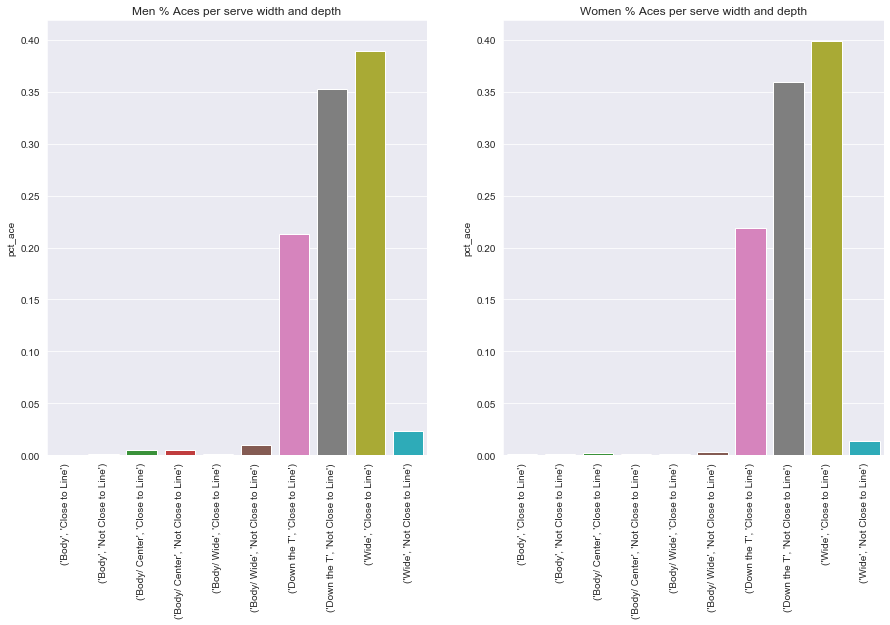

In [61]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(121)
g=sns.barplot(x=m_ace_by_serve.index, y='pct_ace', data=m_ace_by_serve)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Men % Aces per serve width and depth')

ax_2 = plt.subplot(122, sharey=ax)
g=sns.barplot(x=w_ace_by_serve.index, y='pct_ace', data=w_ace_by_serve)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Women % Aces per serve width and depth')

plt.show()

In [62]:
# Grouping by serve width and gathering summary statistics on serve speed kmh with the describe() method
men_info_per_serve_width = men_matches.groupby('serve_width')['serve_speed_kmh'].describe()

men_info_per_serve_width

,count,mean,std,min,25%,50%,75%,max
serve_width,,,,,,,,
Body,10866.0,148.459323,47.501899,0.0,143.0,156.0,173.0,236.0
Body/ Center,19017.0,158.389546,48.208077,0.0,148.0,165.0,188.0,235.0
Body/ Wide,20392.0,155.422421,44.754735,0.0,144.0,164.0,181.0,236.0
Down the T,33118.0,174.102754,46.900685,0.0,169.0,187.0,197.0,235.0
Wide,28899.0,161.883422,48.960486,0.0,159.0,173.0,187.0,231.0


In [63]:
# Grouping by serve width and gathering summary statistics on serve speed kmh with the describe() method
women_info_per_serve_width = women_matches.groupby('serve_width')['serve_speed_kmh'].describe()

women_info_per_serve_width

,count,mean,std,min,25%,50%,75%,max
serve_width,,,,,,,,
Body,8304.0,129.771797,42.037386,0.0,125.0,138.0,152.0,192.0
Body/ Center,12498.0,136.900864,42.805275,0.0,130.0,146.0,161.0,197.0
Body/ Wide,12584.0,132.842339,41.702024,0.0,128.0,141.0,156.0,193.0
Down the T,14518.0,146.921752,42.796142,0.0,143.0,159.0,168.0,202.0
Wide,12132.0,135.189911,47.452838,0.0,135.0,149.0,159.0,196.0


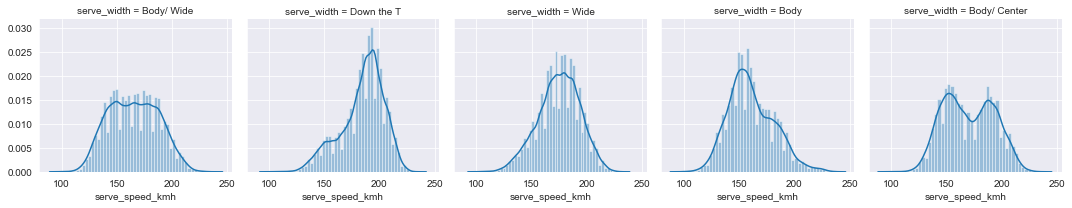

In [64]:
# Creating a grid to plot serve speed kmh distributions for each serve width on one line
g=sns.FacetGrid(data=men_matches[(men_matches['serve_speed_kmh'].notnull()) & (men_matches['serve_speed_kmh'] > 0)], 
                col='serve_width')

# Plotting the distplots
g.map(sns.distplot, 'serve_speed_kmh')

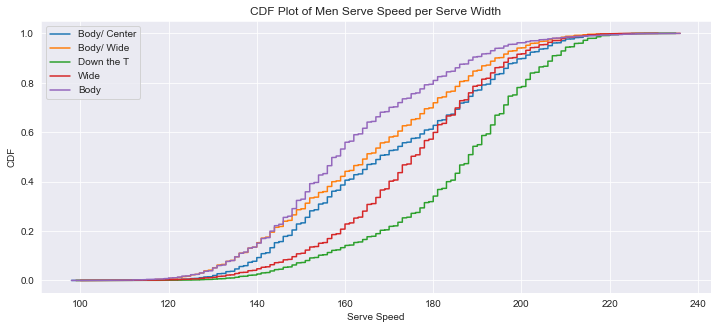

In [65]:
plt.figure(figsize=(12, 5))
for x in men_matches['serve_width'].unique()[1:]:
    np_men_serves = np.array(men_matches[(men_matches['serve_width'] == x) &
                                         (men_matches['serve_speed_kmh'] > 0)]['serve_speed_kmh'])
    np_men_serves = np.sort(np_men_serves)
    men_serves_y = np.arange(1, len(np_men_serves) + 1) / len(np_men_serves)

    plt.plot(np_men_serves, men_serves_y, label=x)
plt.legend()
plt.xlabel('Serve Speed')
plt.ylabel('CDF')
plt.title('CDF Plot of Men Serve Speed per Serve Width')
plt.show()

#### Men Serve Speeds
Body/ Wide serves look normally distributed with an average speed of 155 kmh, a median of 164 kmh and a standard deviation of 44 kmh. The max serve hit in this area is 193 kmh. I suspect an even amount of first and second serves are probably hit in this area.

Down the T serves are slightly left skewed, but also look to be somewhat normally distributed. With the highest mean speed of 146 kmh out of all serve widths for Men, I suspect the left skew could be due to a larger amount of faster first serves being hit in this area. The median is 159, and the standard deviation is 42 which is not much different than other distributions which indicate that a majority of serves in this area are on the faster side with some potential outliers bringing the average down, with the max serve speed being 202 kmh.

Wide Serves are slightly left skewed, but look to be normally distributed. Average serve speed is 161 kmh, with the fastest serve being 231 kmh. I presume that there are a decent amount of second serves, or slower first serves with more spin added to them being hit out wide which account for the left skewness.

Body serves are right skewed with an average serve speed of 148 kmh. This is the slowest average out of all speeds. It seems that a majority of second serves are hit in this area. The distribution does indicate that a fair amount of fast first serves are hit in this area, however I think the majority of serves hit in this area are second serves.

Lastly Body/ Center serves have a bimodal distribution, which can indicate a lot of slower second serves, and a lot of fast first serves. This distribution has an average serve speed of 158 kmh, which is right in the middle of the bimodal splits. It seems like there are probably an equal amount of fast first serves, and slower second serves hit in this area. I presume a lot of fast serves here are first serves that are aimed for the T, but come closer to the Body, and a lot of the slower serves are second serves that have more spin on them.

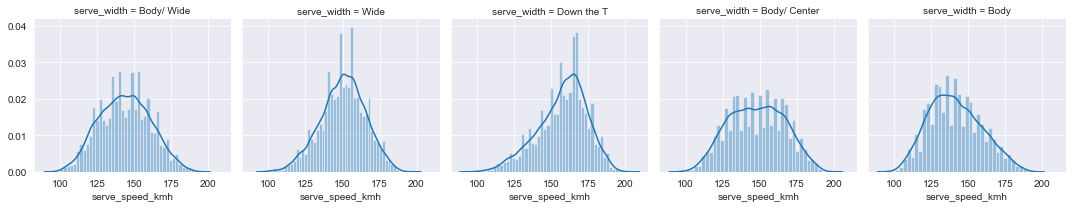

In [66]:
# Creating a grid to plot serve speed kmh distributions for each serve width on one line
g=sns.FacetGrid(data=women_matches[(women_matches['serve_speed_kmh'].notnull()) & 
                                   (women_matches['serve_speed_kmh'] > 0)], 
                col='serve_width')

# Plotting the distplots
g.map(sns.distplot, 'serve_speed_kmh')

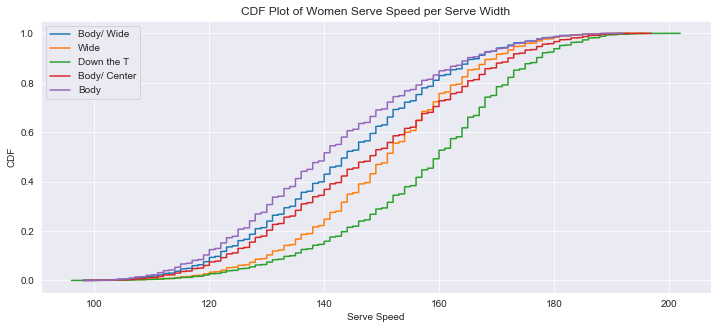

In [67]:
plt.figure(figsize=(12, 5))
for x in women_matches['serve_width'].unique()[1:]:
    np_women_serves = np.array(women_matches[(women_matches['serve_width'] == x) &
                                         (women_matches['serve_speed_kmh'] > 0)]['serve_speed_kmh'])
    np_women_serves = np.sort(np_women_serves)
    women_serves_y = np.arange(1, len(np_women_serves) + 1) / len(np_women_serves)

    plt.plot(np_women_serves, women_serves_y, label=x)
plt.legend()
plt.xlabel('Serve Speed')
plt.ylabel('CDF')
plt.title('CDF Plot of Women Serve Speed per Serve Width')
plt.show()

#### Women Serve Speeds

Body/ Wide serves are normally distributed with a slight left ske, with an average serve speed of 132 kmh, and a median of 141 kmh.

Wide serves are normally distributed also with a slight left skew, with an average serve speed of 135 kmh, and a median of 149 kmh.

Dow the T serves are left skewed, and contain the fastest serves out of all areas with an average serve speed of 146 kmh, and a median of 159 kmh. This makes sense that it would be the area with the fastest serves on average as it was the serve width area with the most percentage of aces.

Body/ Center serves are normally distributed slightly left skewed with an average serve speed of 136 kmh.

Body serves look to be right skewed, but have an average serve speed of 129 kmh, and a median of 138 kmh. 

### 2.3.5 Double Faults
<a id='double_faults'></a>

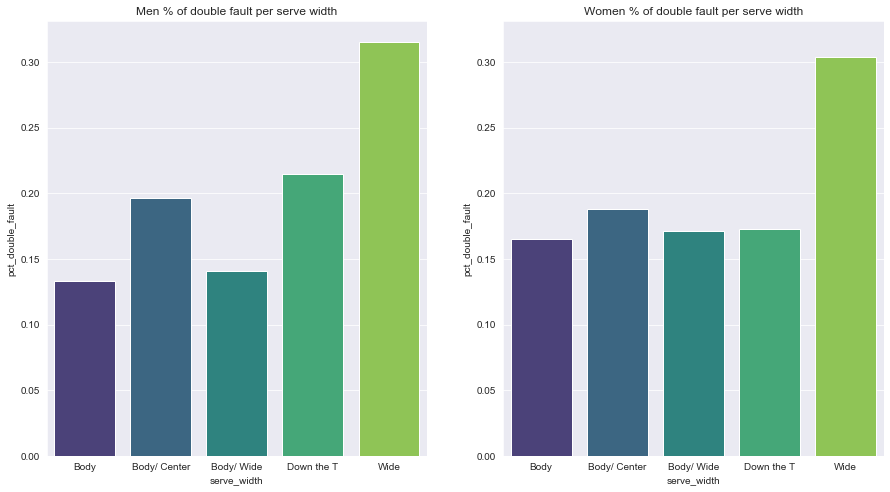

In [68]:
# Looking at where men and women hit most of their double faults

men_df = men_matches[(men_matches['double_fault'] == 1)]
men_df_gb = men_df.groupby('serve_width').match_id.count().reset_index()
men_df_gb.rename(columns={'match_id': 'double_faults'}, inplace=True)
men_df_gb['pct_double_fault'] = men_df_gb['double_faults'] / men_df_gb['double_faults'].sum()

women_df = women_matches[(women_matches['double_fault'] == 1)]
women_df_gb = women_df.groupby('serve_width').match_id.count().reset_index()
women_df_gb.rename(columns={'match_id': 'double_faults'}, inplace=True)
women_df_gb['pct_double_fault'] = women_df_gb['double_faults'] / women_df_gb['double_faults'].sum()

plt.figure(figsize=(15, 8))

ax = plt.subplot(121)
sns.barplot(x='serve_width', y='pct_double_fault', data=men_df_gb, palette='viridis')
plt.title('Men % of double fault per serve width')

ax_2 = plt.subplot(122, sharey=ax)
sns.barplot(x='serve_width', y='pct_double_fault', data=women_df_gb, palette='viridis')
plt.title('Women % of double fault per serve width')
plt.show()

For both Men and Women the majority of double faults come when they serve out wide. Men also serve over 20% of their double faults down the T, and around 19% of their double faults into the Body/ Center- In this case I'm guessing most of their serves are long.

For Women they also hit over 30% of their serves out wide, however the remaining serve areas are more evenly distributed at around 16%, with Body/ Center serves being a little more then the other remainin serve areas.


What this shows me is that if you're a returner, you might want to bait your oppenent to go for a second serve out wide to try and potentially force a double fault.

### Hypothesis Testing

Null Hypothesis: Men Double Fault Total = Women Double Fault Total

In [69]:
men_dfs_ct = men_matches.groupby('double_fault')['match_id'].count().reset_index().set_index('double_fault').rename(
index={0: 'No', 1: 'Yes'}, columns={'match_id': 'Men'}).transpose()

women_dfs_ct = women_matches.groupby('double_fault')['match_id'].count().reset_index().\
set_index('double_fault').rename(index={0: 'No', 1: 'Yes'}, columns={'match_id': 'Women'}).transpose()

dfs_ct = men_dfs_ct.append(women_dfs_ct)

print('Double Fault p-value: %0.3f' % (chi2_contingency(dfs_ct)[1]))

Double Fault p-value: 0.000


We can conclude based on the returned p-value that we reject the null hypothesis, and there is a difference between the amount of double faults Men and Women hit, and it's not due to chance. 

Statistically speaking Women hit a higher percentage of double faults.

## 2.4 Breakpoints for Men vs. Women
<a id='breakpoints'></a>

Looking at the average percentage of breakpoints for Men vs. Women matches

In [70]:
men_breakpoints = len(men_matches[men_matches['break_point'] == 1])

men_pct_breakpoints = men_breakpoints / len(men_matches[(men_matches['break_point'].notnull())])


women_breakpoints = len(women_matches[women_matches['break_point'] == 1])

women_pct_breakpoints = women_breakpoints / len(women_matches[(women_matches['break_point'].notnull())])

print('Percentage of Men Breakpoints: {}'.format(round(men_pct_breakpoints * 100, 2)))
print('Percentage of Women Breakpoints: {}'.format(round(women_pct_breakpoints * 100, 2)))

Percentage of Men Breakpoints: 8.12
Percentage of Women Breakpoints: 11.35


As expected, Women matches would have a higher percentage of total breakpoints than Men matches. I did anticipate Women matches to have higher than just a 3% difference from Men matches when it came to break points. This could be potentially due to the fact that Men might fight off break points easier, leading to a returner needing more opportunites to break in the same service game, which could lead to an inflation in break points. Next I will look at break points converted based on the break chances to see who has a better conversion of break points between Men and Women.

In [71]:
# Looking at breakpoints converted for men vs. Women

men_break_points_won = len(men_matches[men_matches['break_point_won'] == 1])

pct_men_bp_won = men_break_points_won / men_breakpoints


women_break_points_won = len(women_matches[women_matches['break_point_won'] == 1])

pct_women_bp_won = women_break_points_won / women_breakpoints

print('Percentage of Breakpoints won by Men: {}'.format(round(pct_men_bp_won * 100, 2)))
print('Percentage of Breakpoints won by Women: {}'.format(round(pct_women_bp_won * 100, 2)))

Percentage of Breakpoints won by Men: 39.03
Percentage of Breakpoints won by Women: 45.36


As anticipated, Women  do a slightly better job on converting on their break point opportunities then Women. On average Women convert about 45% of their break point opportunities compared to only around 39% for Men. This is a pretty crazy stat, as Women almost have around a 1/2 chance of breaking serve on a breakpoint. This could be largely due to the slower average serve speed, and the higher frequency of closer to the body serves, coupled with less frequent serves near the line, giving the returner a better chance of getting the ball into play. The Second Serve percentage of points won by Women could be another factor - Women are only winning about 43% of their second serve points, and have a First Serve percentage of around 61%, so there's about a 22% chance that a Women will hit a second serve and loose the point on any given point. That's almost a 1/4 chance.

#### Men vs. Women Return Depth

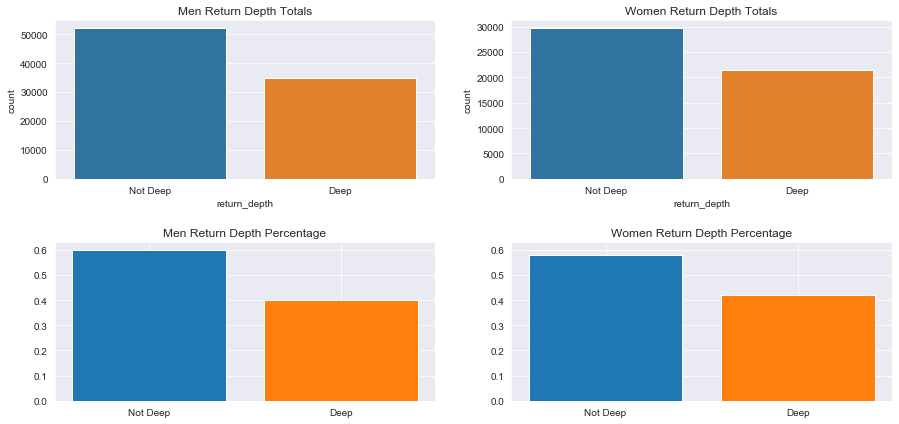

In [72]:
# Next I want to look at the general return depth for Men and Women, and then look at return depth on break points

pct_men_return_depth = {}

for index in men_matches['return_depth'].value_counts().index:
    pct_men_return_depth[index] = men_matches['return_depth'].value_counts()[index] / len(
        men_matches[men_matches['return_depth'].notnull()])
    
pct_women_return_depth = {}

for index in women_matches['return_depth'].value_counts().index:
    pct_women_return_depth[index] = women_matches['return_depth'].value_counts()[index] / len(
        women_matches[women_matches['return_depth'].notnull()])   

plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
sns.countplot(x='return_depth', data=men_matches)
plt.title('Men Return Depth Totals')

plt.subplot(2, 2, 2)
sns.countplot(x='return_depth', data=women_matches)
plt.title('Women Return Depth Totals')

plt.subplots_adjust(hspace=0.4)

ax = plt.subplot(2, 2, 3)
for key, value in pct_men_return_depth.items():
    plt.bar(key, value)
plt.title('Men Return Depth Percentage')
    
plt.subplot(2, 2, 4, sharey=ax)
for key, value in pct_women_return_depth.items():
    plt.bar(key, value)
plt.title('Women Return Depth Percentage')
plt.show()


#### Return Depth on Breakpoint

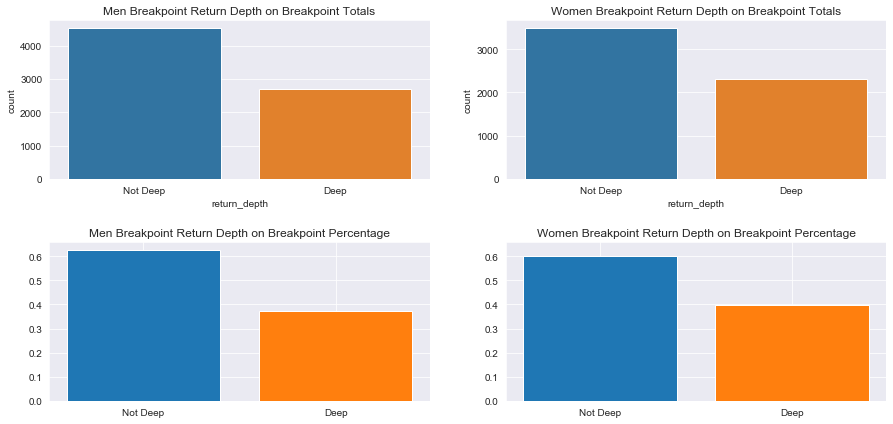

In [73]:
men_bp_df = men_matches[(men_matches['break_point'] == 1)]

women_bp_df = women_matches[(women_matches['break_point'] == 1)]

pct_men_bp_return_depth = {}

for index in men_bp_df['return_depth'].value_counts().index:
    pct_men_bp_return_depth[index] = men_bp_df['return_depth'].value_counts()[index] / len(
        men_bp_df[men_bp_df['return_depth'].notnull()])
    
pct_women_bp_return_depth = {}

for index in women_bp_df['return_depth'].value_counts().index:
    pct_women_bp_return_depth[index] = women_bp_df['return_depth'].value_counts()[index] / len(
        women_bp_df[women_bp_df['return_depth'].notnull()])   

plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
sns.countplot(x='return_depth', data=men_bp_df)
plt.title('Men Breakpoint Return Depth on Breakpoint Totals')

plt.subplot(2, 2, 2)
sns.countplot(x='return_depth', data=women_bp_df)
plt.title('Women Breakpoint Return Depth on Breakpoint Totals')

plt.subplots_adjust(hspace=0.4)

ax = plt.subplot(2, 2, 3)
for key, value in pct_men_bp_return_depth.items():
    plt.bar(key, value)
plt.title('Men Breakpoint Return Depth on Breakpoint Percentage')
    
plt.subplot(2, 2, 4, sharey=ax)
for key, value in pct_women_bp_return_depth.items():
    plt.bar(key, value)
plt.title('Women Breakpoint Return Depth on Breakpoint Percentage')
plt.show()

#### Return Depth based on Serve Width and Serve Depth

In [74]:
# Creating a new dataframe grouping by serve_width, serve_depth and return depth and getting counts for
# return depth for Men
men_rd_based_on_serve_df = men_matches.groupby(['serve_width', 'serve_depth', 'return_depth']).match_id.count().\
reset_index()

# Setting the index to serve_width and serve_depth to create a multi layer index
men_rd_based_on_serve_df.set_index(['serve_width', 'serve_depth'], inplace=True)

# Creating a new column named 'Not Deep', and setting it equal to the counts of Not Deep values for each row based
# on serve width and serve depth
men_rd_based_on_serve_df['Not Deep'] = men_rd_based_on_serve_df.loc[
    men_rd_based_on_serve_df['return_depth'] == 'Not Deep', 'match_id']
# Creating a new column named 'Deep', and setting it equal to the counts of Not Deep values for each row based
# on serve width and serve depth
men_rd_based_on_serve_df['Deep'] = men_rd_based_on_serve_df.loc[
    men_rd_based_on_serve_df['return_depth'] == 'Deep', 'match_id']

# Dropping the return_depth and match_id columns
men_rd_based_on_serve_df.drop(['return_depth', 'match_id'], axis=1, inplace=True)
# Dropping the duplicate values
men_rd_based_on_serve_df.drop_duplicates(inplace=True)

# Creating a column for the total percentage of not deep returns for each serve type
men_rd_based_on_serve_df['pct_not_deep'] = men_rd_based_on_serve_df['Not Deep'] / \
(men_rd_based_on_serve_df['Not Deep'] + men_rd_based_on_serve_df['Deep'])

# Creating a column for the total percentage of deep returns for each serve type
men_rd_based_on_serve_df['pct_deep'] = men_rd_based_on_serve_df['Deep'] / \
(men_rd_based_on_serve_df['Not Deep'] + men_rd_based_on_serve_df['Deep'])



# Creating a new dataframe grouping by serve_width, serve_depth and return depth and getting counts for
# return depth for Women
women_rd_based_on_serve_df = women_matches.groupby(['serve_width', 'serve_depth', 'return_depth']).match_id.\
count().reset_index()

# Setting the index to serve_width and serve_depth to create a multi layer index
women_rd_based_on_serve_df.set_index(['serve_width', 'serve_depth'], inplace=True)

# Creating a new column named 'Not Deep', and setting it equal to the counts of Not Deep values for each row based
# on serve width and serve depth
women_rd_based_on_serve_df['Not Deep'] = women_rd_based_on_serve_df.loc[
    women_rd_based_on_serve_df['return_depth'] == 'Not Deep', 'match_id']
# Creating a new column named 'Deep', and setting it equal to the counts of Not Deep values for each row based
# on serve width and serve depth
women_rd_based_on_serve_df['Deep'] = women_rd_based_on_serve_df.loc[
    women_rd_based_on_serve_df['return_depth'] == 'Deep', 'match_id']

# Dropping the return_depth and match_id columns
women_rd_based_on_serve_df.drop(['return_depth', 'match_id'], axis=1, inplace=True)
# Dropping the duplicate values
women_rd_based_on_serve_df.drop_duplicates(inplace=True)

# Creating a column for the total percentage of not deep returns for each serve type
women_rd_based_on_serve_df['pct_not_deep'] = women_rd_based_on_serve_df['Not Deep'] / \
(women_rd_based_on_serve_df['Not Deep'] + women_rd_based_on_serve_df['Deep'])

# Creating a column for the total percentage of deep returns for each serve type
women_rd_based_on_serve_df['pct_deep'] = women_rd_based_on_serve_df['Deep'] / \
(women_rd_based_on_serve_df['Not Deep'] + women_rd_based_on_serve_df['Deep'])

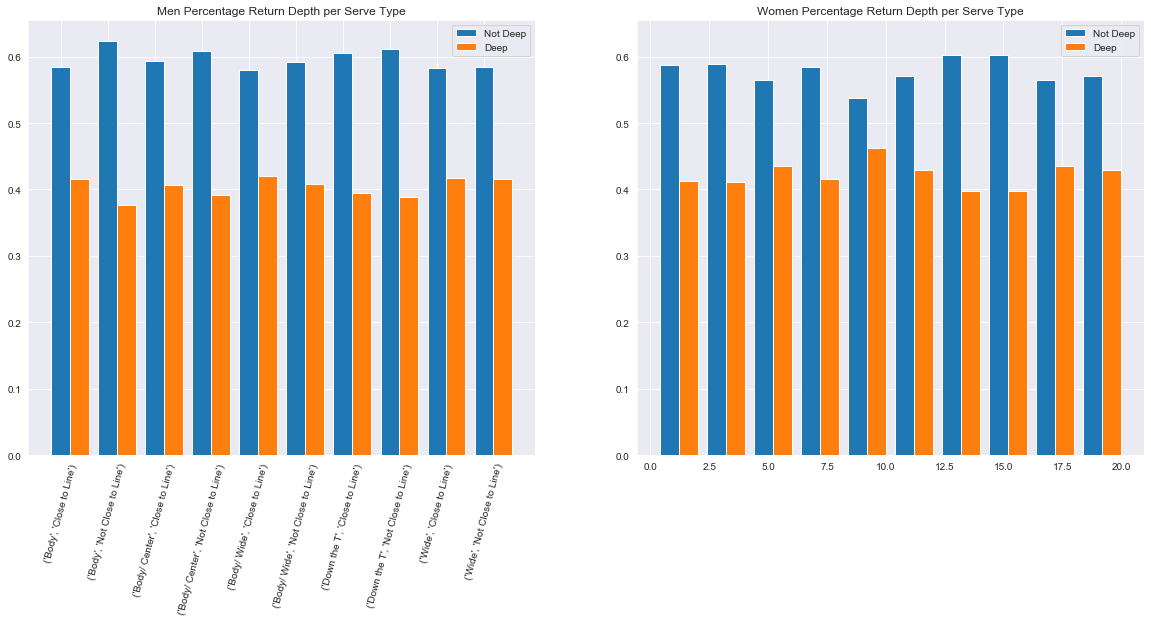

In [75]:
plt.figure(figsize=(20, 8))

ax = plt.subplot(1, 2, 1)
n=1
t=2
d=10
w=0.8
x_values = [t*element + w*n for element in range(d)]
plt.bar(x_values, men_rd_based_on_serve_df['pct_not_deep'], label='Not Deep')
n=2
t=2
d=10
w=0.8
x_values_2 = [t*element + w*n for element in range(d)]
plt.bar(x_values_2, men_rd_based_on_serve_df['pct_deep'], label='Deep')
ax.set_xticks(x_values)
ax.set_xticklabels(men_rd_based_on_serve_df.index, rotation=75)
plt.legend()
plt.title('Men Percentage Return Depth per Serve Type')

plt.subplot(1, 2, 2, sharey=ax)
n=1
t=2
d=10
w=0.8
x_values = [t*element + w*n for element in range(d)]
plt.bar(x_values, women_rd_based_on_serve_df['pct_not_deep'], label='Not Deep')
n=2
t=2
d=10
w=0.8
x_values_2 = [t*element + w*n for element in range(d)]
plt.bar(x_values_2, women_rd_based_on_serve_df['pct_deep'], label='Deep')
ax.set_xticks(x_values)
ax.set_xticklabels(women_rd_based_on_serve_df.index, rotation=75)
plt.legend()
plt.title('Women Percentage Return Depth per Serve Type')

plt.show()

#### Percentage of Breakpoints won based on Serve Width and Depth

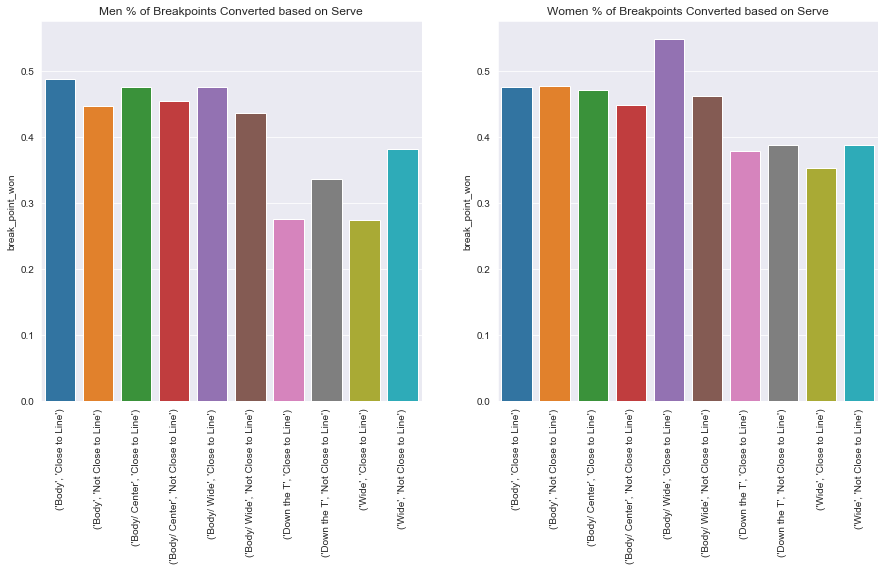

In [76]:
men_return_bp = men_matches[(men_matches['break_point'] == 1)]
women_return_bp = women_matches[(women_matches['break_point'] == 1)]

men_return_bp_gb = men_return_bp.groupby(['serve_width', 'serve_depth']
                                        ).mean()['break_point_won'].reset_index()
men_return_bp_gb.set_index(['serve_width', 'serve_depth'], inplace=True)

women_return_bp_gb = women_return_bp.groupby(['serve_width', 'serve_depth']
                                        ).mean()['break_point_won'].reset_index()
women_return_bp_gb.set_index(['serve_width', 'serve_depth'], inplace=True)

plt.figure(figsize=(15, 7))
ax = plt.subplot(121)
g = sns.barplot(x=men_return_bp_gb.index, y='break_point_won', data=men_return_bp_gb)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Men % of Breakpoints Converted based on Serve')

ax = plt.subplot(122, sharey=ax)
g = sns.barplot(x=women_return_bp_gb.index, y='break_point_won', data=women_return_bp_gb)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Women % of Breakpoints Converted based on Serve')

plt.show()

#### Return Depth based on Serve Width and Serve Depth on Breakpoint

In [77]:
# Creating a dataframe for Male matches where one player has a breakpoint
men_return_bp = men_matches[(men_matches['break_point'] == 1)]

# Creating a new dataframe to groupby serve_width, serve_depth, return_depth, and break point won
men_return_bp_gb = men_return_bp.groupby(['serve_width', 'serve_depth', 'return_depth']
                                        ).mean()['break_point_won'].reset_index()

men_return_bp_gb.set_index(['serve_width', 'serve_depth'], inplace=True)

# Creating a dataframe for Women matches where one player has a breakpoint
women_return_bp = women_matches[(women_matches['break_point'] == 1)]


women_return_bp_gb = women_return_bp.groupby(['serve_width', 'serve_depth', 'return_depth']
                                        ).mean()['break_point_won'].reset_index()

women_return_bp_gb.set_index(['serve_width', 'serve_depth'], inplace=True)

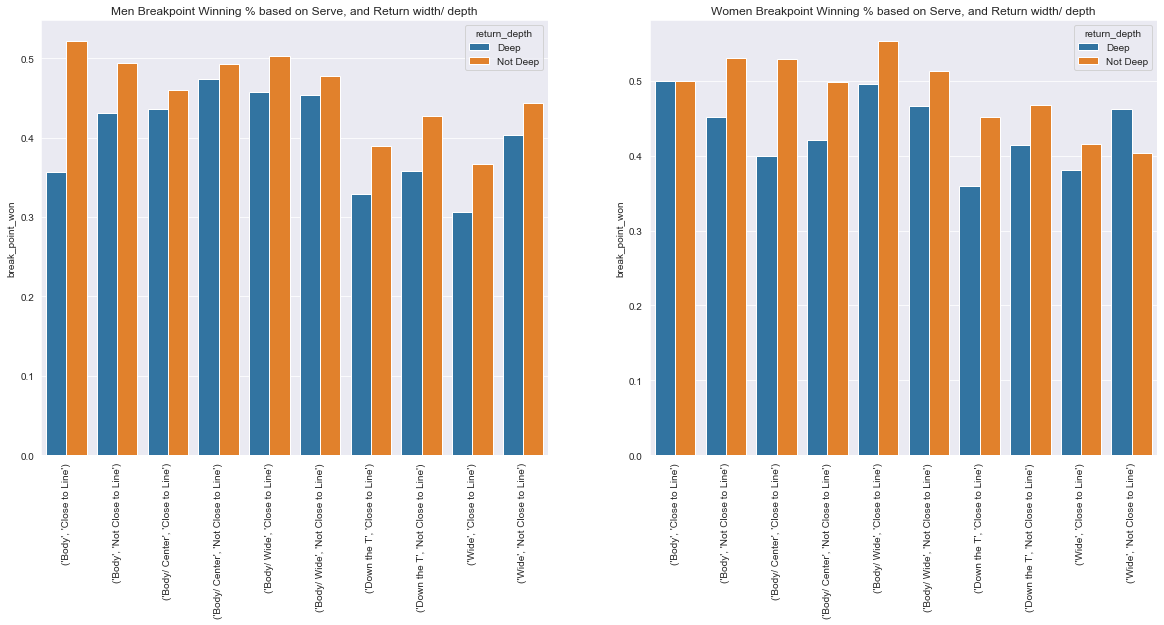

In [78]:
plt.figure(figsize=(20, 8))

ax = plt.subplot(121)
g = sns.barplot(x=men_return_bp_gb.index, y='break_point_won', data=men_return_bp_gb, hue='return_depth')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Men Breakpoint Winning % based on Serve, and Return width/ depth')

ax_2 = plt.subplot(122, sharex=ax)
g = sns.barplot(x=women_return_bp_gb.index, y='break_point_won', data=women_return_bp_gb, hue='return_depth')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Women Breakpoint Winning % based on Serve, and Return width/ depth')
plt.show()

From the visualization I can see a trend showing that Men do a better job of saving breakpoints. Something interesting I noticed is that on average Deep returns have a lower chance of converting a break point, which is contrary to what I initially thought.

For Men, it appears that Wide serves close to the line yield the best chance of saving a break point. Down the T serves close to the line also yield a very good chance of saving a break point. As a returner having shorter returns seems to give you a better opportunity to convert your break point off of any serve that comes at you. I'm curious if this is due to just a higher volume of shorter returns, or if there's something at play here with bringing your opponent into the net for an opportunity to pass them with a passing shot, especially if the return is low which would make it hard to approach the net off of a strong shot.
on Body serves close the the line Men have more than a 50% chance of winning the break point with a short return.


For Women servers I see a similar trend of out wide serves and down the T serves close to the line being the best serves to fight off a break point. Body serves also can benefit the server, depending on the return depth.
A difference in return depth is aparent, as Deep returns for Body + Close to Line serves, and Wide + Not Close to Line serves offer a better chance at converting a break point for the returner. 
For almost all body serves Women have a more than 50% chance of winning break point with a short return.

For both Men and Women in general they have the best opportunity to break with Not Deep returns on Body serves.

#### Ways Points Are Won on Breakpoints

In [79]:
men_bp_gb = men_return_bp.groupby('break_point_won')[['winner_fh', 'winner_bh', 'net_point_won', 'unforced_error',
                                                     'forced_error', 'ace']].mean().reset_index()

women_bp_gb = women_return_bp.groupby('break_point_won')[['winner_fh', 'winner_bh', 'net_point_won', 'unforced_error',
                                                     'forced_error', 'ace']].mean().reset_index()

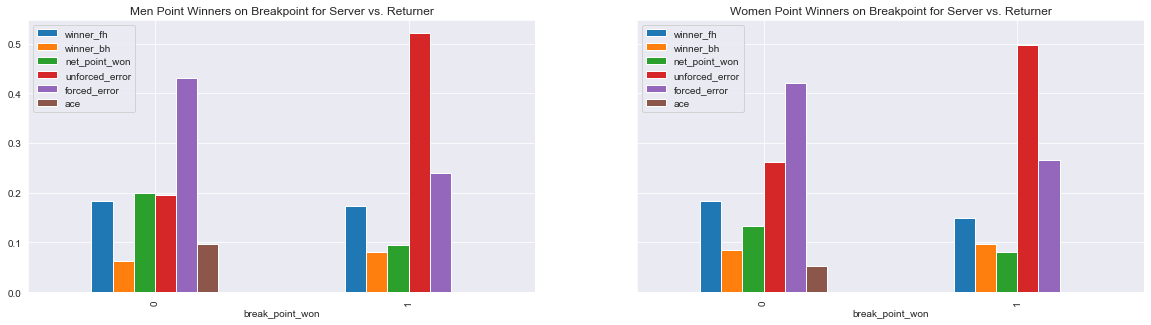

In [80]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))

men_bp_gb.plot(x='break_point_won', y=['winner_fh', 'winner_bh', 'net_point_won',
                                      'unforced_error', 'forced_error', 'ace'], kind='bar', ax=ax,
              title='Men Point Winners on Breakpoint for Server vs. Returner')

women_bp_gb.plot(x='break_point_won', y=['winner_fh', 'winner_bh', 'net_point_won',
                                      'unforced_error', 'forced_error', 'ace'], kind='bar', ax=ax2,
                              title='Women Point Winners on Breakpoint for Server vs. Returner')

From the visualizations above it's very clear that Unforced Errors are the largest proponents of returners winning breakpoints. Men returners win over 50% of breakpoints due to unforced errors, while Women win just under 50% of  breakpoints due to unforced errors.

On the otherside, Men servers only win less than 20% of their points down breakpoint because of unforced errors, and Women servers win around 25% of their points down breakpoint because of unforced errors.
This might be an indicator that nerves effect the server much more than the returner on breakpoints. Especially for Men on breakpoint, unforced errors are only the third highest reason for servers winning the point down breakpoint, whereas for returners it is the highest reason for them winning breakpoints.




## 2.5 Net Points
<a id='net_points'></a>

In [81]:
# Creating a new dataframe for Men net points
men_net_points = men_matches[(men_matches['net_point'] == 1)]
# Creating a new dataframe for Women net points
women_net_points = women_matches[(women_matches['net_point'] == 1)]

In [82]:
print("Men Net Points Won: {}".format(men_net_points['net_point_won'].value_counts()[1]))
print("Women Net Points Won: {}".format(women_net_points['net_point_won'].value_counts()[1]))

Men Net Points Won: 79922
Women Net Points Won: 35043


In [83]:
# Looking at percentages of Net Points won for Men vs. Women

print("Men % Net Points Won: {}".format(round(men_net_points['net_point_won'].value_counts()[1] / 
      len(men_net_points) * 100, 2)))
print("Women % Net Points Won: {}".format(round(women_net_points['net_point_won'].value_counts()[1] /
     len(women_net_points) * 100, 2)))

Men % Net Points Won: 67.83
Women % Net Points Won: 67.97


### Hypothesis Testing

Null Hypothesis: Women and Men win the same percentage of net points

In [84]:
men_npw_ct = men_matches.groupby('net_point_won')['match_id'].count().reset_index().set_index('net_point_won').\
transpose().rename(index={'match_id' : 'Men'}, columns={0: 'No', 1: 'Yes'})

women_npw_ct = women_matches.groupby('net_point_won')['match_id'].count().reset_index().set_index('net_point_won').\
transpose().rename(index={'match_id' : 'Men'}, columns={0: 'No', 1: 'Yes'})

npw_ct = men_npw_ct.append(women_npw_ct)

print('Net Point Won p-value %0.3f' % (chi2_contingency(npw_ct)[1])) 

Net Point Won p-value 0.000


From the chi-squared hypothesis test above we reject the null hypothesis and conclude that Women do in fact win more net points then Men on average, and that the small difference of 0.14 is not due to chance.

## 2.6 Distance Run
<a id='distance_run'></a>

In [85]:
# Adding the distances run for p1 and p2 into a single series for Men
men_distance_run = men_matches['p1_distance_run'].append(men_matches['p2_distance_run'])

# Getting rid of Distance Run values = 0
men_distance_run = men_distance_run[men_distance_run > 0]


# Adding the distances run for p1 and p2 into a single series for Women
women_distance_run = women_matches['p1_distance_run'].append(women_matches['p2_distance_run'])

# Getting rid of Distance Run values = 0
women_distance_run = women_distance_run[women_distance_run > 0]

In [86]:
# Looking at the summary statistics for Distance run per point for Men
men_distance_run.describe()

count    303065.000000
mean         14.717467
std          18.959680
min           0.003000
25%           3.758000
50%           8.819000
75%          18.130000
max         445.469000
dtype: float64

In [87]:
# Looking at the summary statistics for Distance run per point for Women
women_distance_run.describe()

count    167721.000000
mean         15.654106
std          19.281127
min           0.032000
25%           4.194000
50%           9.618000
75%          19.318000
max         282.858000
dtype: float64

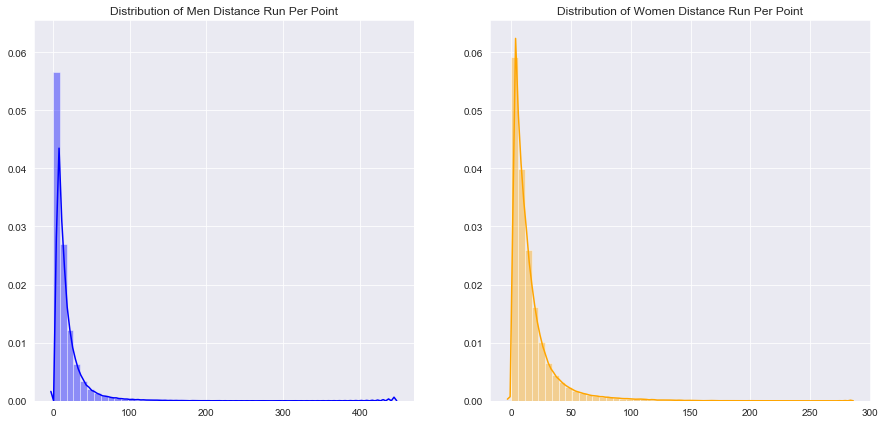

In [88]:
# Plotting Distribution plots of Distance run for Men and Women

plt.figure(figsize=(15, 7))
ax = plt.subplot(121)
sns.distplot(men_distance_run[men_distance_run.notnull()], color='blue', bins=50)
plt.title('Distribution of Men Distance Run Per Point')

plt.subplot(122, sharey=ax)
sns.distplot(women_distance_run[women_distance_run.notnull()], color='orange', bins=50)
plt.title('Distribution of Women Distance Run Per Point')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


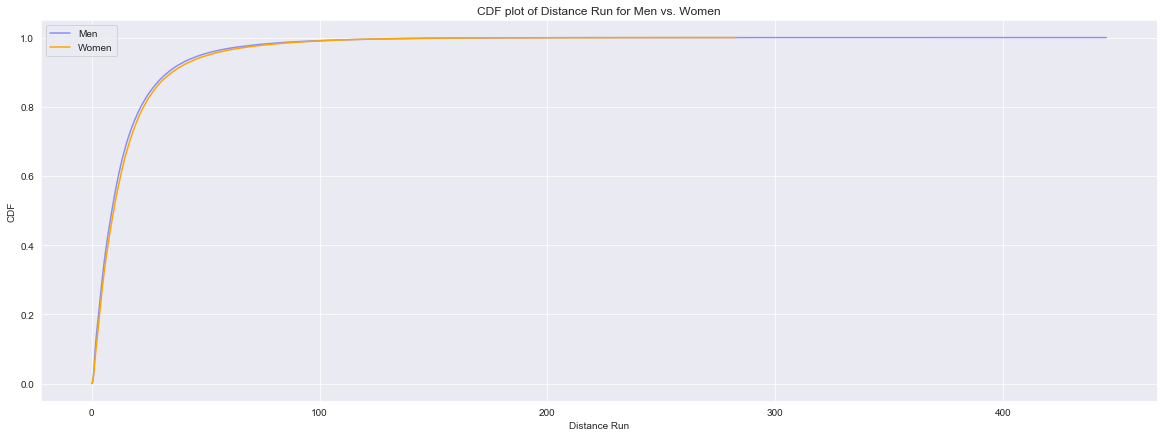

In [89]:
# Comparing Men and Women Distance Run distributions with a CDF

# Plotting a CDF to compare dsitributions

men_dr = np.array(men_distance_run[men_distance_run.notnull()])
men_dr = np.sort(men_dr)
men_dr_y = np.arange(1, len(men_dr) + 1) / len(men_dr)

women_dr = np.array(women_distance_run[women_distance_run.notnull()])
women_dr = np.sort(women_dr)
women_dr_y = np.arange(1, len(women_dr) + 1) / len(women_dr)

plt.figure(figsize=(20, 7))
plt.plot(men_dr, men_dr_y, color='blue', label='Men', alpha=0.4)
plt.plot(women_dr, women_dr_y, color='orange', label='Women')
plt.margins = 0.02
plt.xlabel('Distance Run')
plt.ylabel('CDF')
plt.legend()
plt.title('CDF plot of Distance Run for Men vs. Women')

plt.show()

### Hypothesis Test
Null Hypothesis: Men and Women run the same distance per point on average as each other

In [90]:
print('Distance Run p-value: %0.3f' % (ttest_ind(men_distance_run, women_distance_run)[1]))

Distance Run p-value: 0.000


Given the p-value above, we can reject the null hypothesis and conclude that Women run more distance per point on average then Men do.

### Point End Based on Distance Run

In [91]:
# Calculating an average Distance run per point between player 1 and player 2 for Men matches
men_matches['average_distance_run'] = men_matches.apply(lambda row: (row['p1_distance_run'] + 
                                                       row['p2_distance_run']) / 2, axis=1)

# Calculating an average Distance run per point between player 1 and player 2 for Women matches
women_matches['average_distance_run'] = women_matches.apply(lambda row: (row['p1_distance_run'] + 
                                                       row['p2_distance_run']) / 2, axis=1)

<ipython-input-91-3ea8843db0f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_matches['average_distance_run'] = men_matches.apply(lambda row: (row['p1_distance_run'] +
<ipython-input-91-3ea8843db0f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_matches['average_distance_run'] = women_matches.apply(lambda row: (row['p1_distance_run'] +


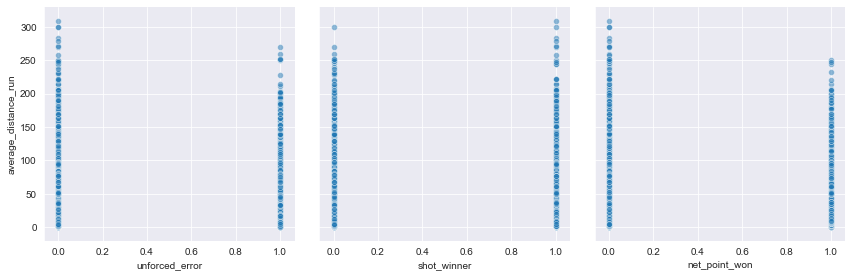

In [92]:
# Plotting scatterplots to look at unforced errors, forced errors, and forehand and backhand winners, based on
# distance run for Men

g = sns.PairGrid(data=men_matches, x_vars=['unforced_error', 'shot_winner', 'net_point_won'],
             y_vars='average_distance_run', height=4)
g.map(sns.scatterplot, x_jitter=True, y_jitter=True, alpha=0.5)

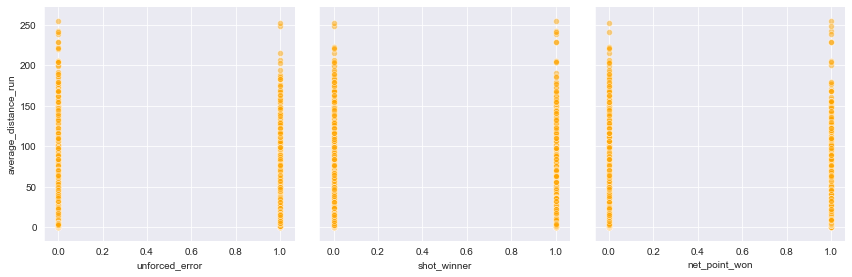

In [93]:
# Plotting scatterplots to look at unforced errors, forced errors, and forehand and backhand winners, based on
# distance run for Women

g = sns.PairGrid(data=women_matches, x_vars=['unforced_error', 'shot_winner', 'net_point_won'],
             y_vars='average_distance_run', height=4)
g.map(sns.scatterplot, x_jitter=True, y_jitter=True, alpha=0.5, color='orange')

In [94]:
# Creating Quantile points for Men and Women in regards to average distance run per point so I can further investigate
# how distance run effects unforced errors, shot winners, or net points won.

men_dr_q1 = men_matches['average_distance_run'].describe()['25%']
men_dr_q2 = men_matches['average_distance_run'].describe()['50%']
men_dr_q3 = men_matches['average_distance_run'].describe()['75%']

women_dr_q1 = women_matches['average_distance_run'].describe()['25%']
women_dr_q2 = women_matches['average_distance_run'].describe()['50%']
women_dr_q3 = women_matches['average_distance_run'].describe()['75%']

In [95]:
# Converting distance_run_q values based on average_distance_run values, assigning either Q1, Q2, Q3, or Q4
# for both Men and Women

men_matches.loc[(men_matches['average_distance_run'] <= men_dr_q1) &
                (men_matches['average_distance_run'].notnull()), 'distance_run_q'] = 'Q1'

men_matches.loc[(men_matches['average_distance_run'] > men_dr_q1) &
                (men_matches['average_distance_run'] < men_dr_q2), 'distance_run_q'] = 'Q2'

men_matches.loc[(men_matches['average_distance_run'] > men_dr_q1) &
                (men_matches['average_distance_run'] > men_dr_q2) & 
                (men_matches['average_distance_run'] < men_dr_q3), 'distance_run_q'] = 'Q3'
                 
men_matches.loc[(men_matches['average_distance_run'] > men_dr_q3) & 
                (men_matches['average_distance_run'].notnull()), 'distance_run_q'] = 'Q4'


# Converting for Women data below
women_matches.loc[(women_matches['average_distance_run'] <= women_dr_q1) &
                (women_matches['average_distance_run'].notnull()), 'distance_run_q'] = 'Q1'

women_matches.loc[(women_matches['average_distance_run'] > women_dr_q1) &
                (women_matches['average_distance_run'] < women_dr_q2), 'distance_run_q'] = 'Q2'

women_matches.loc[(women_matches['average_distance_run'] > women_dr_q1) &
                (women_matches['average_distance_run'] > women_dr_q2) & 
                (women_matches['average_distance_run'] < women_dr_q3), 'distance_run_q'] = 'Q3'
                 
women_matches.loc[(women_matches['average_distance_run'] > women_dr_q3) & 
                (women_matches['average_distance_run'].notnull()), 'distance_run_q'] = 'Q4'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [96]:
# Grouping by Quantiles and averaging out unforced error, shot winner and net point won for Men distance run
men_dr_effects = men_matches.groupby('distance_run_q')['unforced_error', 
                                                       'shot_winner', 'net_point_won'].mean().reset_index()

men_dr_effects

,distance_run_q,unforced_error,shot_winner,net_point_won
0,Q1,0.304105,0.333219,0.128768
1,Q2,0.207661,0.604768,0.004097
2,Q3,0.269965,0.265657,0.091962
3,Q4,0.314593,0.345032,0.233761


In [97]:
# Grouping by Quantiles and averaging out unforced error, shot winner and net point won for Women distance run
women_dr_effects = women_matches.groupby('distance_run_q')['unforced_error', 
                                                           'shot_winner', 'net_point_won'].mean().reset_index()

women_dr_effects

,distance_run_q,unforced_error,shot_winner,net_point_won
0,Q1,0.360845,0.304662,0.104243
1,Q2,0.342814,0.309345,0.001997
2,Q3,0.355178,0.263056,0.071957
3,Q4,0.328177,0.368101,0.199562


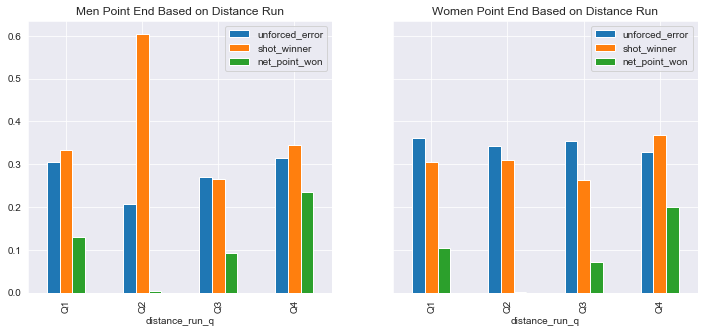

In [98]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))

men_dr_effects.plot(x='distance_run_q', y=['unforced_error', 'shot_winner', 'net_point_won'], 
                    kind='bar', ax=ax, title='Men Point End Based on Distance Run')

women_dr_effects.plot(x='distance_run_q', y=['unforced_error', 'shot_winner', 'net_point_won'], 
                    kind='bar', ax=ax2, title='Women Point End Based on Distance Run')
plt.show()

### Hypothesis Testing
Null Hypothesis: Men and Women hit the same amount of winners In Quratile 2 of Distance run

In [99]:
men_q2_winner_ct = men_matches[men_matches['distance_run_q'] == 'Q2'].groupby('shot_winner')['match_id'].count()\
.reset_index().set_index('shot_winner').transpose().rename(index={'match_id': 'Men'}, columns={0: 'No', 1:' Yes'})

women_q2_winner_ct = women_matches[women_matches['distance_run_q'] == 'Q2'].groupby('shot_winner')['match_id']\
.count().reset_index().set_index('shot_winner').transpose().rename(
    index={'match_id': 'Women'}, columns={0: 'No', 1:' Yes'})

q2_winner_ct = men_q2_winner_ct.append(women_q2_winner_ct)

print('Q2 shot winner p-value: %0.3f' % (chi2_contingency(q2_winner_ct)[1]))

Q2 shot winner p-value: 0.000


Null Hypothesis: Men and Women hit the same amount of unforced errors In Quratile 1 of Distance run

In [100]:
men_q1_ue_ct = men_matches[men_matches['distance_run_q'] == 'Q1'].groupby('unforced_error')['match_id'].count()\
.reset_index().set_index('unforced_error').transpose().rename(index={'match_id': 'Men'}, columns={0: 'No', 1:' Yes'})

women_q1_ue_ct = women_matches[women_matches['distance_run_q'] == 'Q1'].groupby('unforced_error')['match_id']\
.count().reset_index().set_index('unforced_error').transpose().rename(
    index={'match_id': 'Women'}, columns={0: 'No', 1:' Yes'})

q1_ue_ct = men_q1_ue_ct.append(women_q1_ue_ct)

print('Q1 shot unforced error p-value: %0.3f' % (chi2_contingency(q1_ue_ct)[1]))

Q1 shot unforced error p-value: 0.000


We can reject the null hypothesis for both hypothesis tests above, and conclude that there is statistical significance behing the following - Men hit more shot winners in Q2 of distance run than Women, and Women hit more unforced errors than Men in Q1 of distance run.

What I can conclude here is that there is not a huge difference in the distribution of average distances run per point for Men vs. Women, but there is statistical significance to support the statement that Women do run longer distances per point on average then Men do.

It also doesn't seem like distance run has a direct effect on unforced errors, winners, and net points won like I presumed. However that being said there is a trend for Men to end a majority of their points with winners, especially when they have run less than 2.61 meters during a point, with over 60% of those points ending in with shot winners. This could be due to Serve and one, or serve and two shots, or return in one/ two points where the serve sets the server up to hit a winner on the next one or two shots, or the return of serve sets the returner up to hit a winner on the next one or two shots.

Women win a majority of their points with unforced errors for each quantile, except for points where they run above the 75th percentile distance run - those points are won over 35% of the time due to shot winners. This could be due to the fact that as players run longer distances they become increasingly fatigued. This may allow a player to hit a shot that would normally not be a winner at the beginning of the point, but because their opponent is too tired to try and retrieve the ball the shot ends up being a winner.

An interesting trend I see for both Men and Women is that as the distance run gets longer, the majority of net points won seems to increase. This indicates that the more you make your opponent run, the better chance you might have of ending the point at the net. 

## 2.7 Point Length in Time
<a id ='point_time'></a>

In [101]:
# Converting point_time into timedelta objects for both Men and Women matches
men_matches['point_time'] = men_matches['point_time'].apply(lambda x: pd.to_timedelta(x))

women_matches['point_time'] = women_matches['point_time'].apply(lambda x: pd.to_timedelta(x))

<ipython-input-101-c14dfa4d8732>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_matches['point_time'] = men_matches['point_time'].apply(lambda x: pd.to_timedelta(x))
<ipython-input-101-c14dfa4d8732>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_matches['point_time'] = women_matches['point_time'].apply(lambda x: pd.to_timedelta(x))


In [102]:
# Creating a new column of point time in seconds for both Men and Women matches
men_matches['point_time_in_seconds'] = men_matches['point_time'].apply(lambda x: x.total_seconds())

women_matches['point_time_in_seconds'] = women_matches['point_time'].apply(lambda x: x.total_seconds())

<ipython-input-102-01d1990c68b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_matches['point_time_in_seconds'] = men_matches['point_time'].apply(lambda x: x.total_seconds())
<ipython-input-102-01d1990c68b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_matches['point_time_in_seconds'] = women_matches['point_time'].apply(lambda x: x.total_seconds())


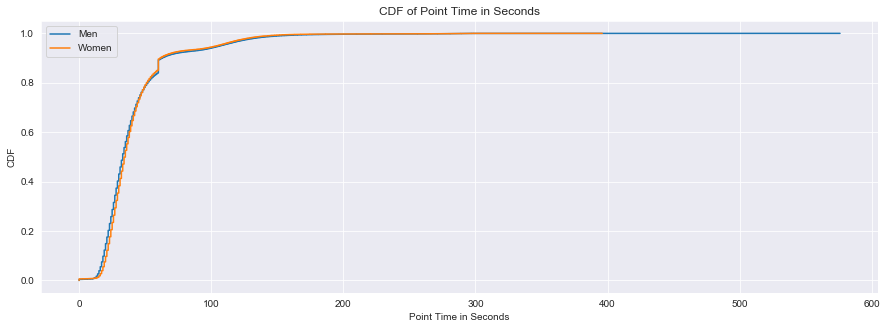

In [103]:
# Looking at CDFs of time of point in seconds for Men and Women points to compare the distributions
plt.figure(figsize=(15, 5))

nn_pts = men_matches[men_matches['point_time_in_seconds'].notnull()] 

men_point_time_in_seconds = np.array(nn_pts[nn_pts.groupby("point_time_in_seconds")
                                            ["point_time_in_seconds"].transform('size') > 1]['point_time_in_seconds'])

men_point_time_in_seconds = np.sort(men_point_time_in_seconds)

men_y = np.arange(1, len(men_point_time_in_seconds)+1) / len(men_point_time_in_seconds)


nn_w_pts = women_matches[women_matches['point_time_in_seconds'].notnull()] 

women_point_time_in_seconds = np.array(nn_w_pts[nn_w_pts.groupby("point_time_in_seconds")
                                            ["point_time_in_seconds"].transform('size') > 1]['point_time_in_seconds'])

women_point_time_in_seconds = np.sort(women_point_time_in_seconds)

women_y = np.arange(1, len(women_point_time_in_seconds)+1) / len(women_point_time_in_seconds)

plt.plot(men_point_time_in_seconds, men_y, label='Men')
plt.plot(women_point_time_in_seconds, women_y, label='Women')
plt.xlabel('Point Time in Seconds')
plt.ylabel('CDF')
plt.legend()
plt.title('CDF of Point Time in Seconds')

plt.show()

There seems to be some big discrepencies, as there are points that are listed as lasting 10 minutes. Knowing that can't be true, and is most likely due to sampling error, I am going to restrict the distribution window to 120 seconds to get a better look at the distributions, since I don't expect any points were more than 2 minutes long, and about 95% of the points are below about 2 minutes from the CDF plots above.

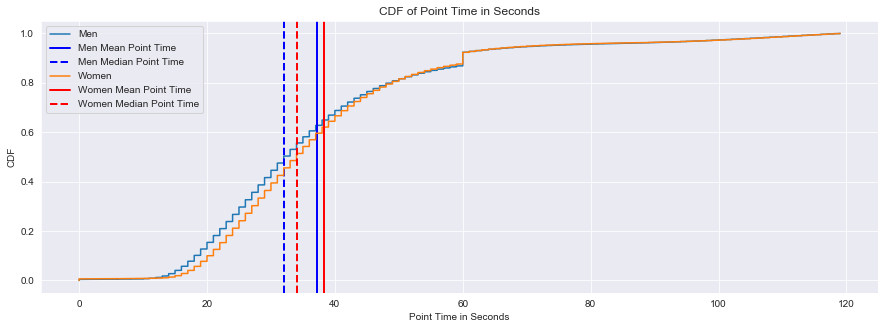

In [104]:
plt.figure(figsize=(15, 5))

men_point_time_in_seconds = men_point_time_in_seconds[men_point_time_in_seconds < 120]
men_point_time_in_seconds = np.sort(men_point_time_in_seconds)

men_y = np.arange(1, len(men_point_time_in_seconds)+1) / len(men_point_time_in_seconds)

women_point_time_in_seconds = women_point_time_in_seconds[women_point_time_in_seconds < 120]
women_point_time_in_seconds = np.sort(women_point_time_in_seconds)

women_y = np.arange(1, len(women_point_time_in_seconds)+1) / len(women_point_time_in_seconds)

plt.plot(men_point_time_in_seconds, men_y, label='Men')
plt.axvline(x=men_point_time_in_seconds.mean(), lw=2, color='blue', label='Men Mean Point Time')
plt.axvline(x=np.median(men_point_time_in_seconds), lw=2, color='blue', ls='--', label='Men Median Point Time')

plt.plot(women_point_time_in_seconds, women_y, label='Women')
plt.axvline(x=women_point_time_in_seconds.mean(), lw=2, color='red', label='Women Mean Point Time')
plt.axvline(x=np.median(women_point_time_in_seconds), lw=2, color='red', ls='--', label='Women Median Point Time')
plt.xlabel('Point Time in Seconds')
plt.ylabel('CDF')
plt.legend()
plt.title('CDF of Point Time in Seconds')

plt.show()

From the plot above I can see that Women points are generally slightly longer in seconds than Men points from about 15 seconds to 50 seconds. At about 50 seconds that amount of points that last 50 seconds are about even for Men and Women, and they remain pretty even until 120 seconds. We can tell that about 80% of Men and Women points are below 50 seconds, which makes sense given that Tennis is such a fast paced sport. It looks as if the point time in seconds follows a normal distribution up until about 60 seconds. 

Women have a higher median and mean seconds per point then Men, and the CDF plot describes what may be the reason for this. The distributions are relatively even, except for about 15-50 seconds. It shows as mentioned above that Women play a lot more points between 15-50 seconds, which can describe the higher median and mean point time in seconds.

### Hypothesis Testing

Null Hypothesis: Men and Women Point times in seconds are equal

In [105]:
men_point_times_in_seconds = men_matches[men_matches['point_time_in_seconds'].notnull()]['point_time_in_seconds']

women_point_times_in_seconds = women_matches[women_matches['point_time_in_seconds'].notnull()]['point_time_in_seconds']

print('Point Time p-value: %0.3f' % (ttest_ind(men_point_times_in_seconds, women_point_times_in_seconds)[1]))

Point Time p-value: 0.002


From our hypothesis test we can conclude that the difference in the means of Men point lengths, and Women point lengths in seconds is statistically significant. So this verifies that Women tend to have more points between 15-50 seconds then Men, and Men tend to have more points between 50-60 seconds then Women. It also verifies that Women on average have a higher mean of point time in seconds.

In [106]:
men_matches.to_csv('men_matches.csv')

In [107]:
women_matches.to_csv('women_matches.csv')